<a href="https://colab.research.google.com/github/Avit-hodibu/Artificial-Neural-Network-/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning

It is subfield of AI and ML that is inspired by the structure of a human brain.

DL algo attempt to draw similar conclusions as humans would by continually analyzing data with a given logical structure called Neural Network.

Perceptron is connected with each other with arrow which we call weight.

In one stright line vertically perceptron is placed is called layer. First layer is called input layer and last layer is output layer and in the middle all layer is hidden layer.  

DL is part of a broader family of ML methods based on ANN with representation learning.

DL algo uses multiple layers to progressively extract higher-level features from the raw input. For example, in image processing, lower layers may identify edges, while higher layers may identify the concepts relevant to a human such as digits or letters or faces.

CNN = image data

RNN = text/speech data

GAN = to generate things (text/image)

Why DL ?
- applicablity
- performance

DL vs ML
- data dependency: DL need more data
- hardware dependency: DL need GPU
- training time: training time is high. prediction time fast in DL
- feature selection: DL automaticly extract features behind the scene
- interpretablity: Since Dl work behind the scene like black box, you will not know why something is happen or predicted the actual reason.

Architectures of DL:

Image classification = ResNET

Text classification = BERT

Image segment = Unet

image translation = Pix2Pix

object detection = YOLO

speech generation = WaveNET

# Neural Networks

Types of NN:
1.  Multi-layer perception: multiple perception are arrange in layers. can be use in any problem, especially in supervised problem in nonlinear
2. CNN(convolutional NN): It NN where aleast one layer is convolution layer.
3. RNN(Recurrent NN): other previous are feed forward NN but, in RNN, in layer of hidden it feed backward aleast once and goes to hidden layer. It has variation name LSTM. These are use mainly in NLP
4. Auto encoders: you have the input data which you want to compress without lossing the quality. In this input layer and output layer have similar nodes but hidden  layer has less nodes.
5. Generative Adverserial Networks(GAN):
there is generator and discriminator. Generator generate the data and send to discriminator to check. Once the generator create a data that discriminator cannot identify whether it is real or fake, it is sucessfula and called auto generated data.

**History of DL**

 perception works on linear function. XOR canot able to solve

 paper= learning representations using backpropogating errors. if use bunch of perception it will converse the non-linear function also. If you add many hidden layer you can converse to any mathamatical function.




**Application**

self driving cars(CNN)

game playing agents

Virtual assistant(RNN)

Image colorlization:

Adding audio in mute video

Image caption generation

Text translation

Pixel Restroation

object detection

Deep dreaming

# Perceptron

It is algorithm. It is used for supervised ML. It has design in a way which become the building block of DL

https://www.sharpsightlabs.com/wp-content/uploads/2023/07/perceptrons-explained_FEATURED-IMAGE.png

It is a mathamatical function.

b = bias , w = weight, x= input

connector has tha weight and bias and is sum at sumation then it is called z and the z travel to activation function(f). The work of f is to make sure that z comes under certain range.

z = w1x1 + w2x2 + b

**Training**:
we train with data in perceptron. we train the value of bias and weight by using X and y. W and b adjust according to the value of X to get y

**Prediction**:
we put value of x input. it will calculate and give z value. the z value is give to activation function and give the output y.



more weight means it impact more.

**Geometric Intuition**:
sumation give z= w1x1+w2x2+b

x1 and x2 is input value. w1 and w2 and weight of input. b is bias.

lets replace x1 with x, x2 with y, w1 with A, w2 with B and b with C. Then,

z= Ax+By+C --- this is equation of line.

This means perceptron is line

Y = f(z) = 1 if z>=0 and 0 if z<0.

Ax+By+C>=0

Ax+By+C<0

these are region.

This means perceptron is line that create two region.  This why perceptron is a binary classifier.

When we have 3 input then it work as plane. It still create 2 region. more than 2 is called hyperplane.

So, if we have non-linear dataset then perceptron will fail.

In [ ]:
# code
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("placement.csv")

In [ ]:
print(df.shape)
df.head()

(100, 3)


cgpa  resume_score  placed
0  8.14          6.52       1
1  6.17          5.17       0
2  8.27          8.86       1
3  6.88          7.27       1
4  7.52          7.30       1

<Axes: xlabel='cgpa', ylabel='resume_score'>

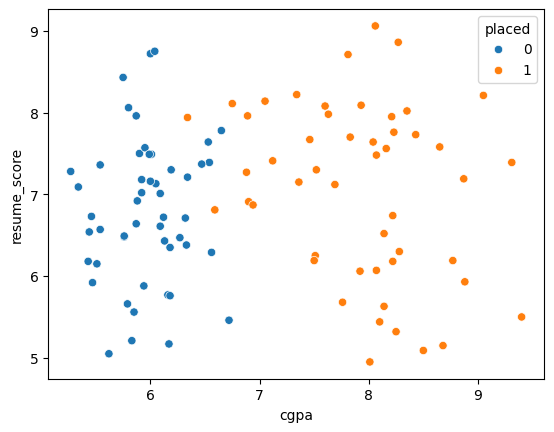

In [ ]:
sns.scatterplot(x='cgpa', y='resume_score', hue='placed', data=df)

In [ ]:
from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(df[['cgpa', 'resume_score']], df['placed'])

Perceptron()

In [ ]:
p.coef_

array([[ 40.26, -36.  ]])

In [ ]:
p.intercept_

array([-25.])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

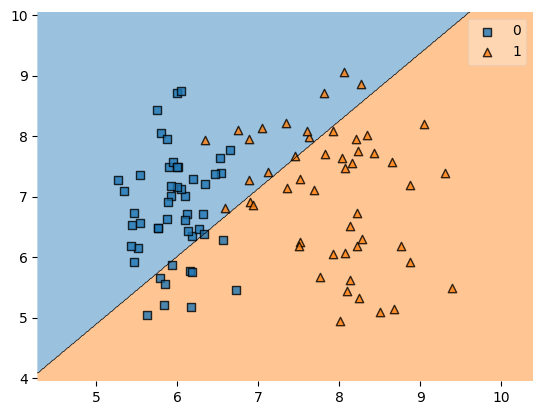

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(df[['cgpa', 'resume_score']].values, df['placed'].values, clf=p)

## Percepton Trick

Ax1 + Bx2 + C = 0 general equation of line

Our objective is find the value of A, B and C that can perfectly seperated the region

we initailized the line. we use loop in which we select randomly one point. Ask that point, are you correctly classified? if not then we change the line and make it correctly classified. again we repeat the process.

 you can use number of epoch or number of converge

How to label the regions?

Ax1+Bx2+C > 0 then positive region. Ax1+Bx2+C < 0 then negative region. if Ax1+Bx2+C = 0 then line.

**Transformations:**
if only C value change it is parallel move up and down with previous line.

if only A value change it is rotate keeping y axis same put change in x-axis.

if only B value change it is rotate keeping x axis same put change in y-axis.

we use learning rate for transformation.

new coef = previous coef - lr * coordinate  

what we do is Ax1+Bx2+C=0 and point is (x,y) then for new line:

A, B and C is coefficent and x, y is cordinate. 3 number is coefficent and 2 number is coordinate that means we canot subtract. So, we add another number to coordinate that is 1 then

coeff A B C

-coor x y 1 * lr

this gives new coeff

if you want to move line to negative direction than we add new coef = previous coef + lr * coordinate

and if we want to move to postive direction we sub

new coef = previous coef - lr * coordinate

**Algorithm**

Ax + By + C = 0

C + Ax + By = 0

w0 + w1x1 + w2x2 = 0 , then w0=C, w1=A, w2=B

we also add imaginary column x0 which has value 1 for all. This is for bias. then it will be

w0x0 + w1x1 + w2x2 = 0

sumation E i=0 to n-dim wixi = 0,  where n-dim is number of dimension.  

we do is matrix multiplaction W * X


epoch = n, lr=0.01

for i in range(epochs):

  if xi E N and E i=0 to n-dim wixi >= 0(postive)

    wnew = wold - lr * xi

  if xi E P and E i=0 to n-dim wixi < 0 (negative)

    wnew = wold + lr * xi

  if xi E N and E i=0 to n-dim wixi < 0 || if xi E P and E i=0 to n-dim wixi >= 0

    no change  

**Actual algorithm**

for i to rang(n-epoch):

select a random data(i)

Wn = W0 + lr (Yi - Yi hat) Xi

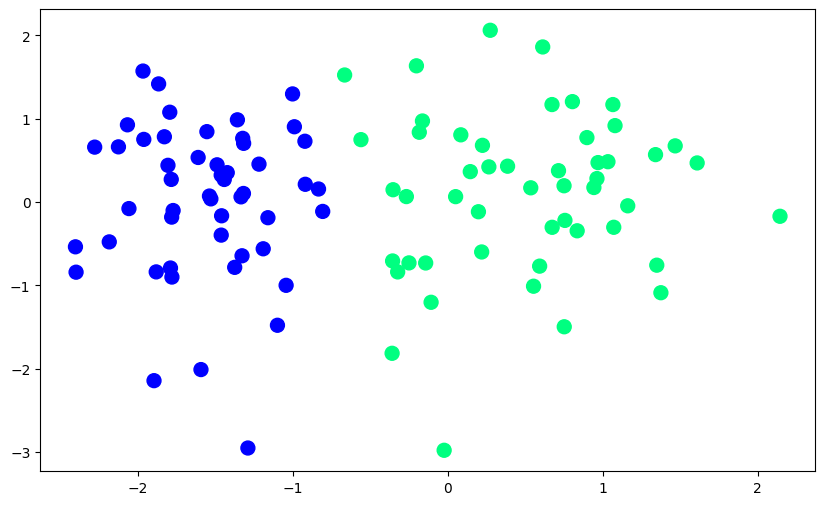

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [ ]:
def step(z):
  return 1 if z>0 else 0

In [ ]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1) # adding 1 to index 0 for bias
    weights = np.ones(X.shape[1]) # initializing weight value 1
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights)) # step do when greater than zero then give 1 and smaller than zero give 0
        weights = weights + lr*(y[j]-y_hat)*X[j] # update weight

    return weights[0],weights[1:]

In [ ]:
intercept_,coef_ = perceptron(X,y)

In [ ]:
print("weight:",coef_)
print("intercept:",intercept_)

weight: [1.30549088 0.09529354]
intercept: 1.0


for line in graph

Ax + By + C = 0 change to y = mx + b

m= -A/B , c= -C/B


In [ ]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [ ]:
x_input = np.linspace(-3,3,100) # create 100 number from -3 to 3
y_input = m*x_input + b

(-3.0, 2.0)

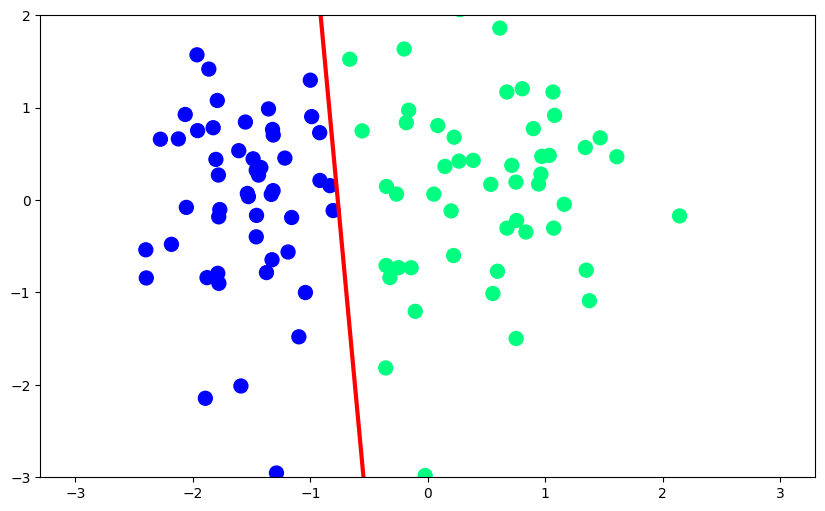

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## Perceptron Loss Function

**Problem with Perceptron Trick**

line made from w1, w2 and b we cannot be confident that this is the best line we can draw.

The way it classify we are not quantify which is the best line to seperate.

there are be problem in converge. each time we select we only select correct point that mean no changes in line. what if incorrect classified line never select.

**To solve problem of perceptron trick we use loss function**

because of loss function we can quantify how much better the result is.

**loss function** it is a way to tell how much well ML working.

Loss function can be calculate by the distance perpendicular to the line of all errrors.

Although in perceptron, loss function calculated is not by the distance.
we put value of error datas in the equation of the line and the value it give is loss function. if the value comes negative then we make positive. It is directly proportional to the distance.

loss function=sum of error data |Ax+By+C|

loss function L(w1,w2,b) = (1/n E i=1 to n L(Yi, f(Xi))) + alpha R(w1,w2)

R= regulatization

when regulatization is not use we can ignore it.

L(Yi, f(Xi))=max(0, -Yi f(Xi)), where f(Xi) = w1x1+w2x2+b

this is the loss function

loss function L(w1,w2,b) = (1/n E i=1 to n max(0, -Yi f(Xi)))

n = number of rows in data

L= argmin w1,w2,b (1/n E i=1 to n max(0, -Yi f(Xi)))

we need to find the value of w1, w2, b by which we can get minimum value of L. so, to find this we used gradinet descent.

**Explanation of Loss Function**

loss function L(w1,w2,b) = (1/n E i=1 to n max(0, -Yi f(Xi))) , where f(Xi) = w1x1+w2x2+b

Lets break:

max(0, -Yi f(Xi)), let's say -Yi f(Xi) be X then if value of X>=0 then it give X as answer and if it less than 0 then 0 is the answer

lets say we only have 2 points then n = 2:,

L= 1/2 [max(0, -Y1 f(X1)) + max(0, -Y2 f(X2)) ]

i) when Yi = 1 and Yi hat =1 then

f(X1)= w1x1 +w2x2 +b>=0 this means it is positive (+ve value)

max(0, -Y1 f(X1))= max(0, -1 * (+ve))

this means: -*+ = -

max(0, -ve) = 0

ii) Yi = -1 and Yi hat =-1 then

f(X1)= w1x1 +w2x2 +b<0 this means it is positive (-ve value)

max(0, -Y1 f(X1))= max(0, - (-1) * (-ve))

this means: -*- *+ = -

max(0, -ve) = 0

iii)Yi = 1 and Yi hat =-1 then

f(X1)= w1x1 +w2x2 +b<0 this means it is positive (-ve value)

max(0, -Y1 f(X1))= max(0, - (1) * (-ve))

this means: - *- = +

max(0, +ve) = +ve

iv) Yi = -1 and Yi hat = 1 then

f(X1)= w1x1 +w2x2 +b>=0 this means it is positive (+ve value)

max(0, -Y1 f(X1))= max(0, - (-1) * (ve))

this means: - *- = +

max(0, +ve) = +ve


This show that when it is correctely classifed then it have 0 contribution. If noly misclassified we do calcuation of loss function










**Gradient Descent**

L= argmin w1,w2,b (1/n E i=1 to n max(0, -Yi f(Xi)))

we need to find the value of w1, w2, b

where f(Xi) = w1x1+w2x2+b

for i in epochs:

  w1 = w1 - lr dL/dw1

  w1 = w2 - lr dL/dw2

  b = b - lr dL/b


we need to find [dL/dw1, dL/dw2, dL/db]

dL/dw1 = dL/ df(xi) * df(xi)/dw1

df(xi)/dw1= (w1x1+w2x2+b)/dw1 = xi1

dL/ df(xi) = [0 if yif(xi)>=0 or -yi if yif(xi)<0]

this gives:

dL/dw1 = [0 if yif(xi)>=0 or -yi xi1 if yif(xi)<0]

Going by same logic:

dL/dw2 = [0 if yif(xi)>=0 or -yi xi2 if yif(xi)<0]

dL/db = [0 if yif(xi)>=0 or -yi if yif(xi)<0]

**code**


In [ ]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

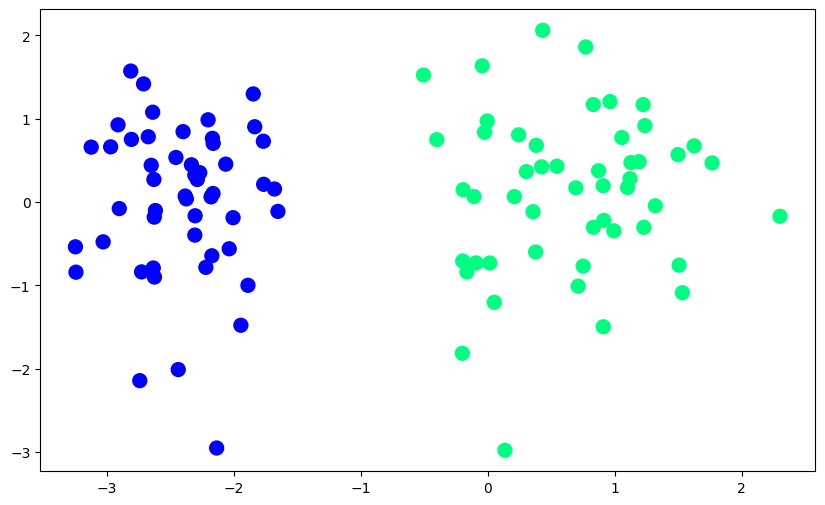

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [ ]:
def perceptron(X,y):

    w1=w2=b=1 # intial by 1
    lr = 0.1

    for j in range(1000):

        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]

    return w1,w2,b

In [ ]:
w1,w2,b = perceptron(X,y)

In [ ]:
w1, w2, b

(1.006638570722407, 0.22215119727529098, 1.3000000000000003)

In [ ]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

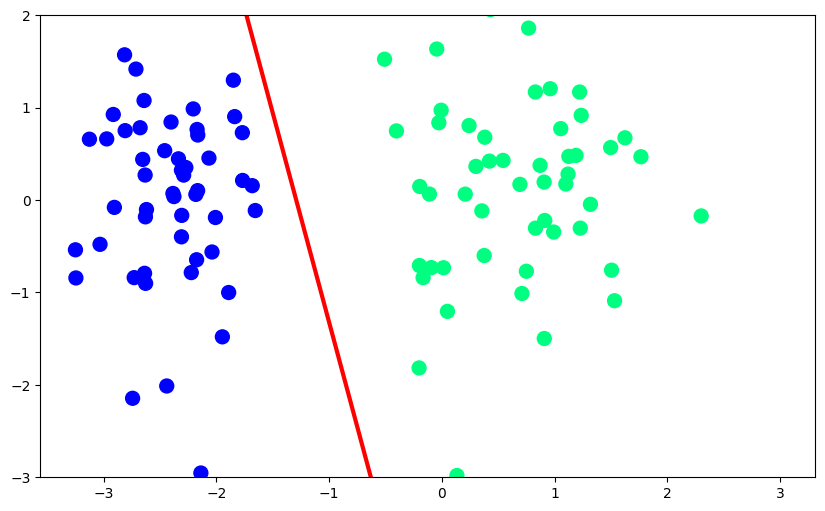

In [ ]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

For more loss function

if we want activation funtion to be proba then we can use sigmod function and we can use binary cross entropy as loss funtion.

L= -Yi logYi hat  + (1-Yi) log(1-Yi hat)

SDG = output proba


if we want to have multi-class then we can use activation funcation as softmax and loss fun = categorical cross entropy

this is softmax regression

Perceptron is flexiable


loss function | activation | output

hinge loss-> step -> perceptron ( binary classfication )

log-loss(binary cross entropy) -> sigmoid -> logistic regression (binary classifier)

categorical cross-entropy -> softmax -> softmax-regression (multiclass classifier)

mse -> linear -> linear reg(number)

**Probem**
perceptron canot work with non linear data

# Multi layer perceptron

we need to make an algorithm by which we can slove non-linear. For that we need to do multi-layer perceptron.

In sigmoid function, the proba p(Y) > p(N) increase as it goes farther from the line in postive side and vice-versa.

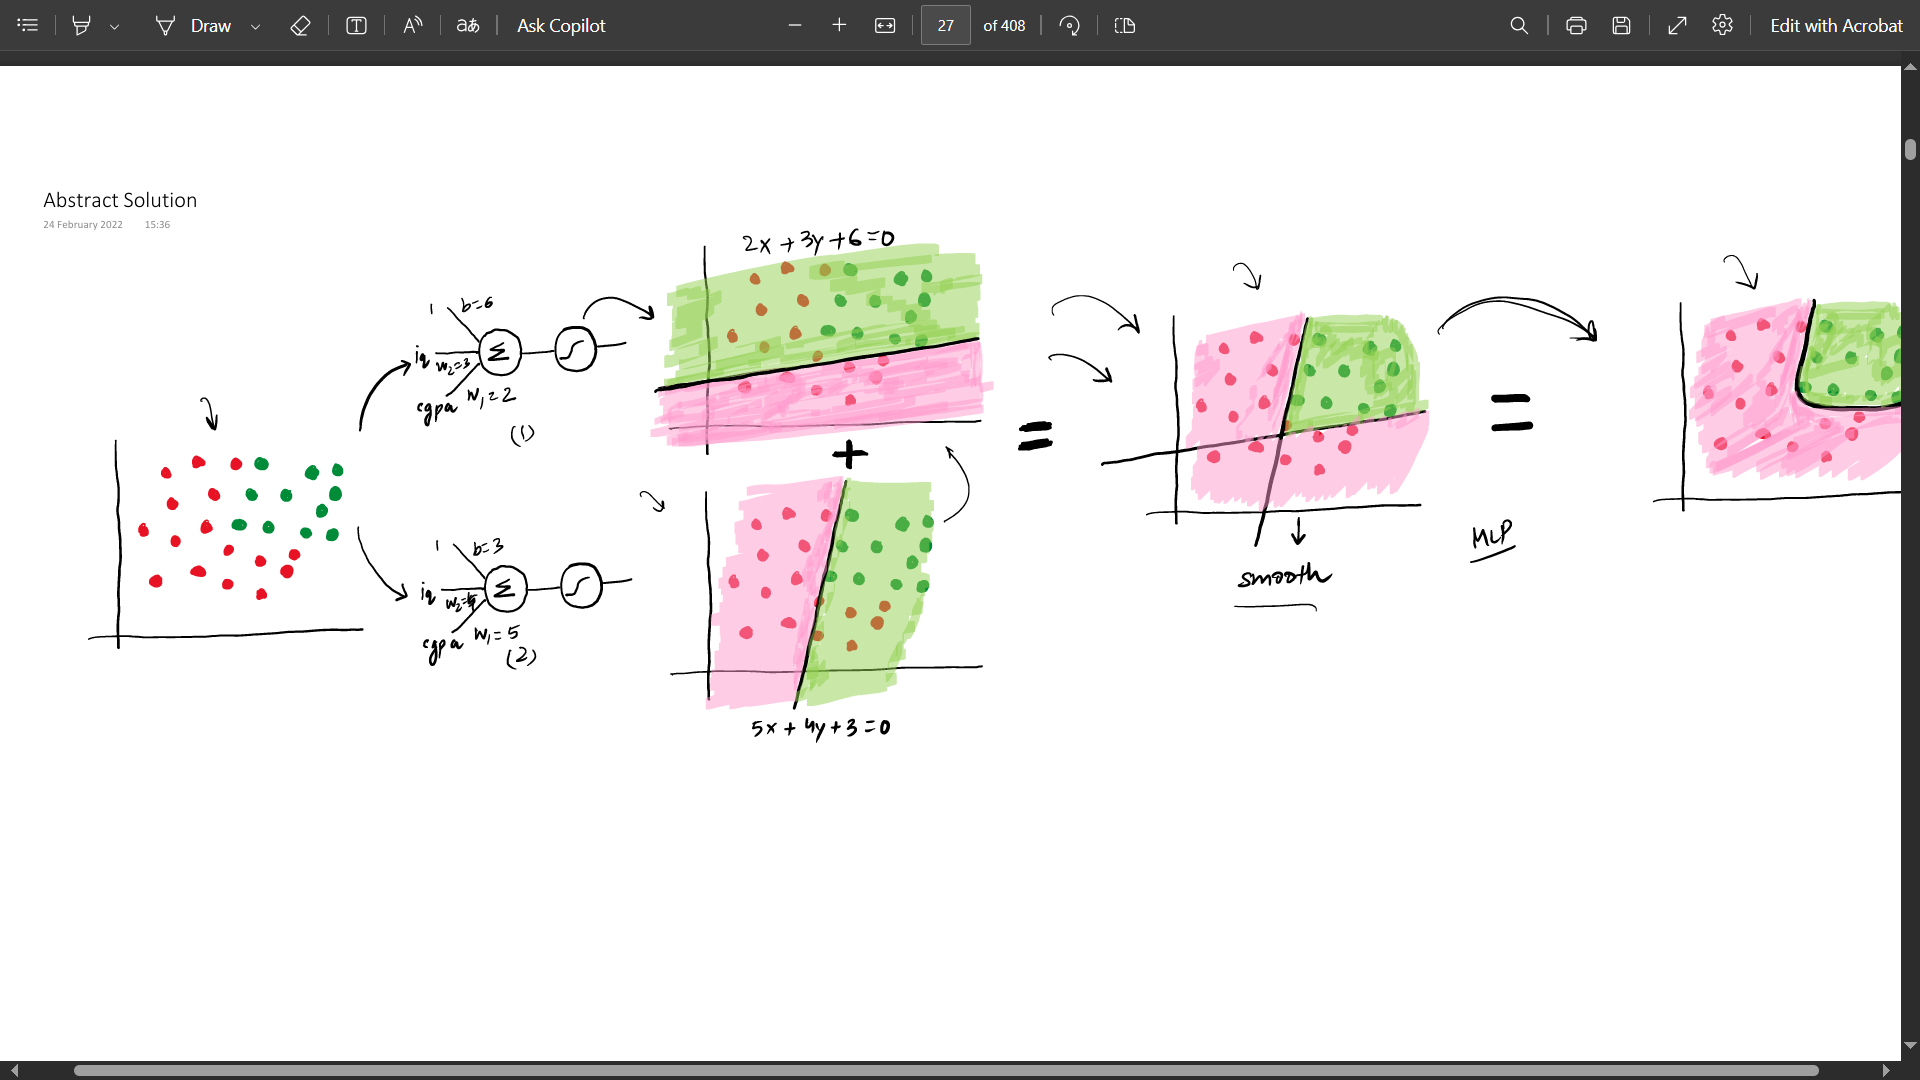

Two perceptron give two different result and after combining both it give good result.

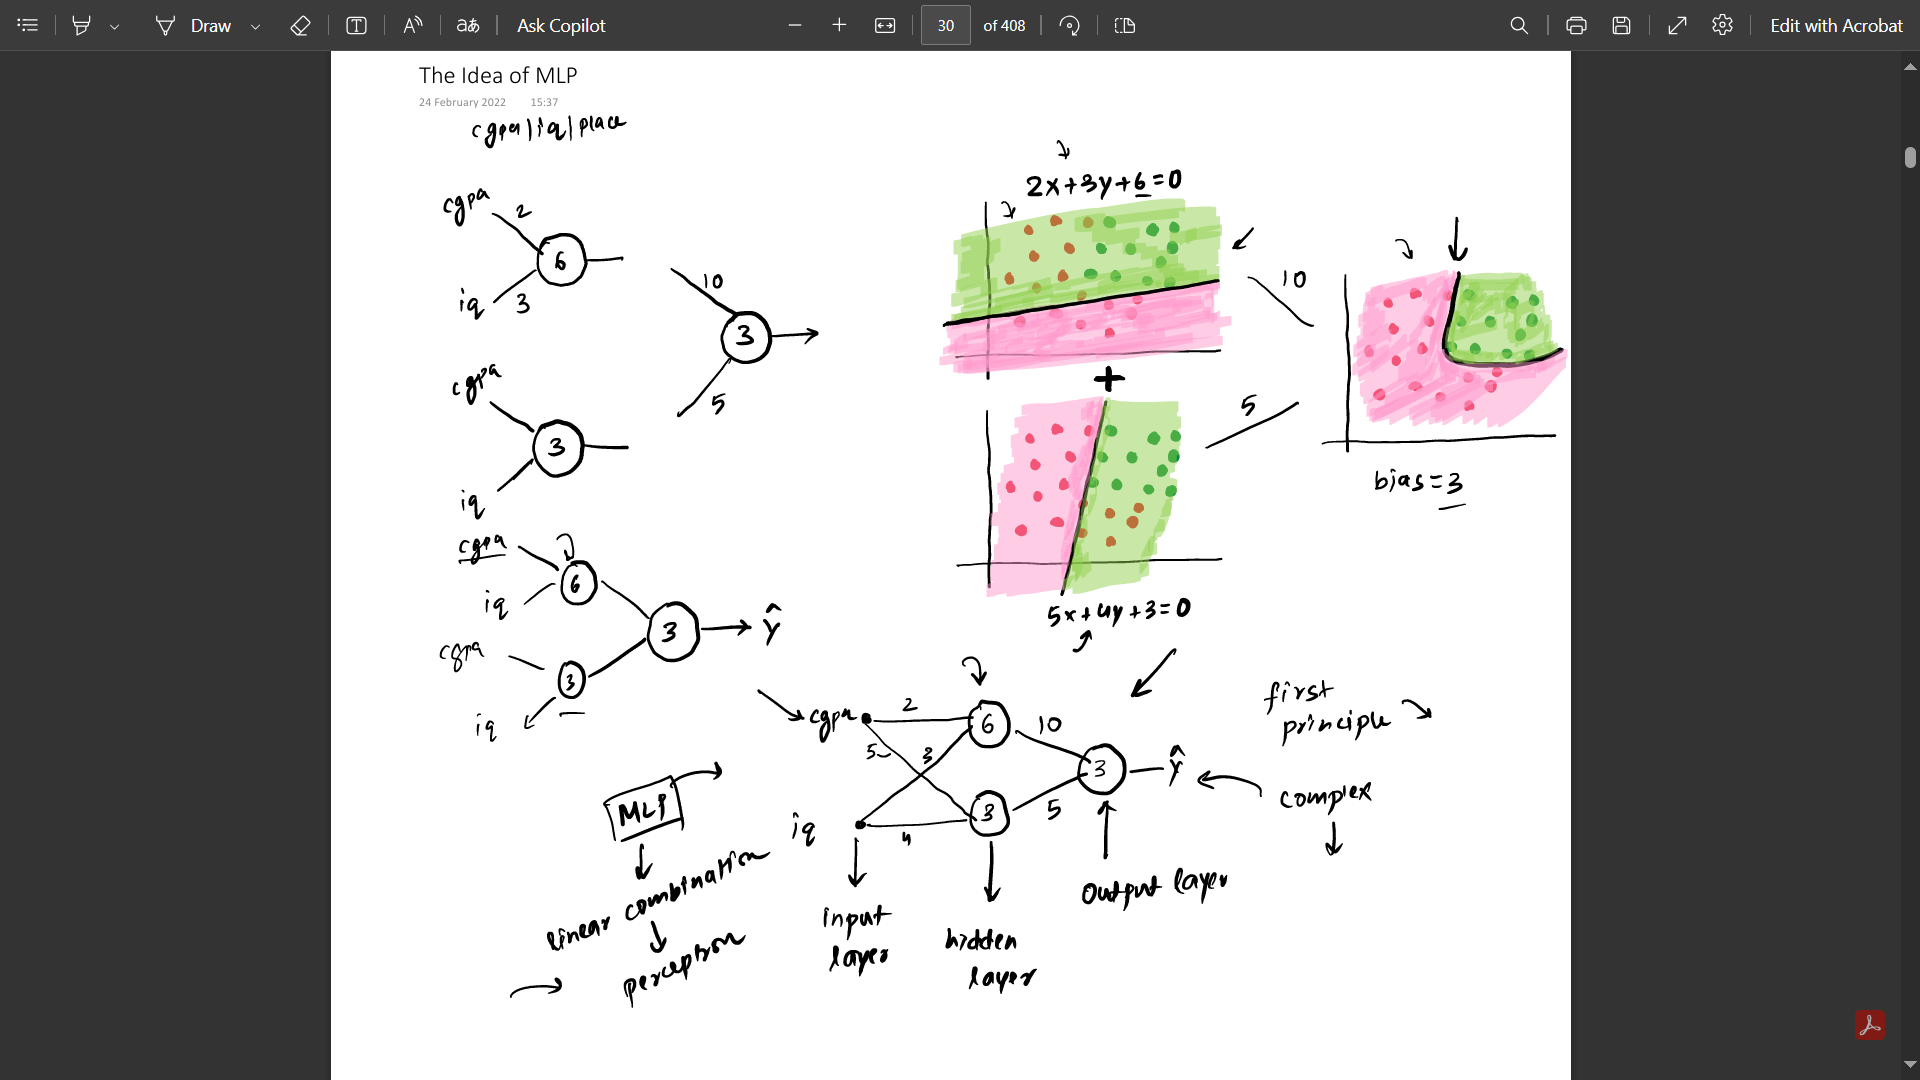

Impact depend upon weight assign.

Here we are making 3 perceptron combination. first layer have 2 perceptron which combine in 1 perceptron abd finally give output

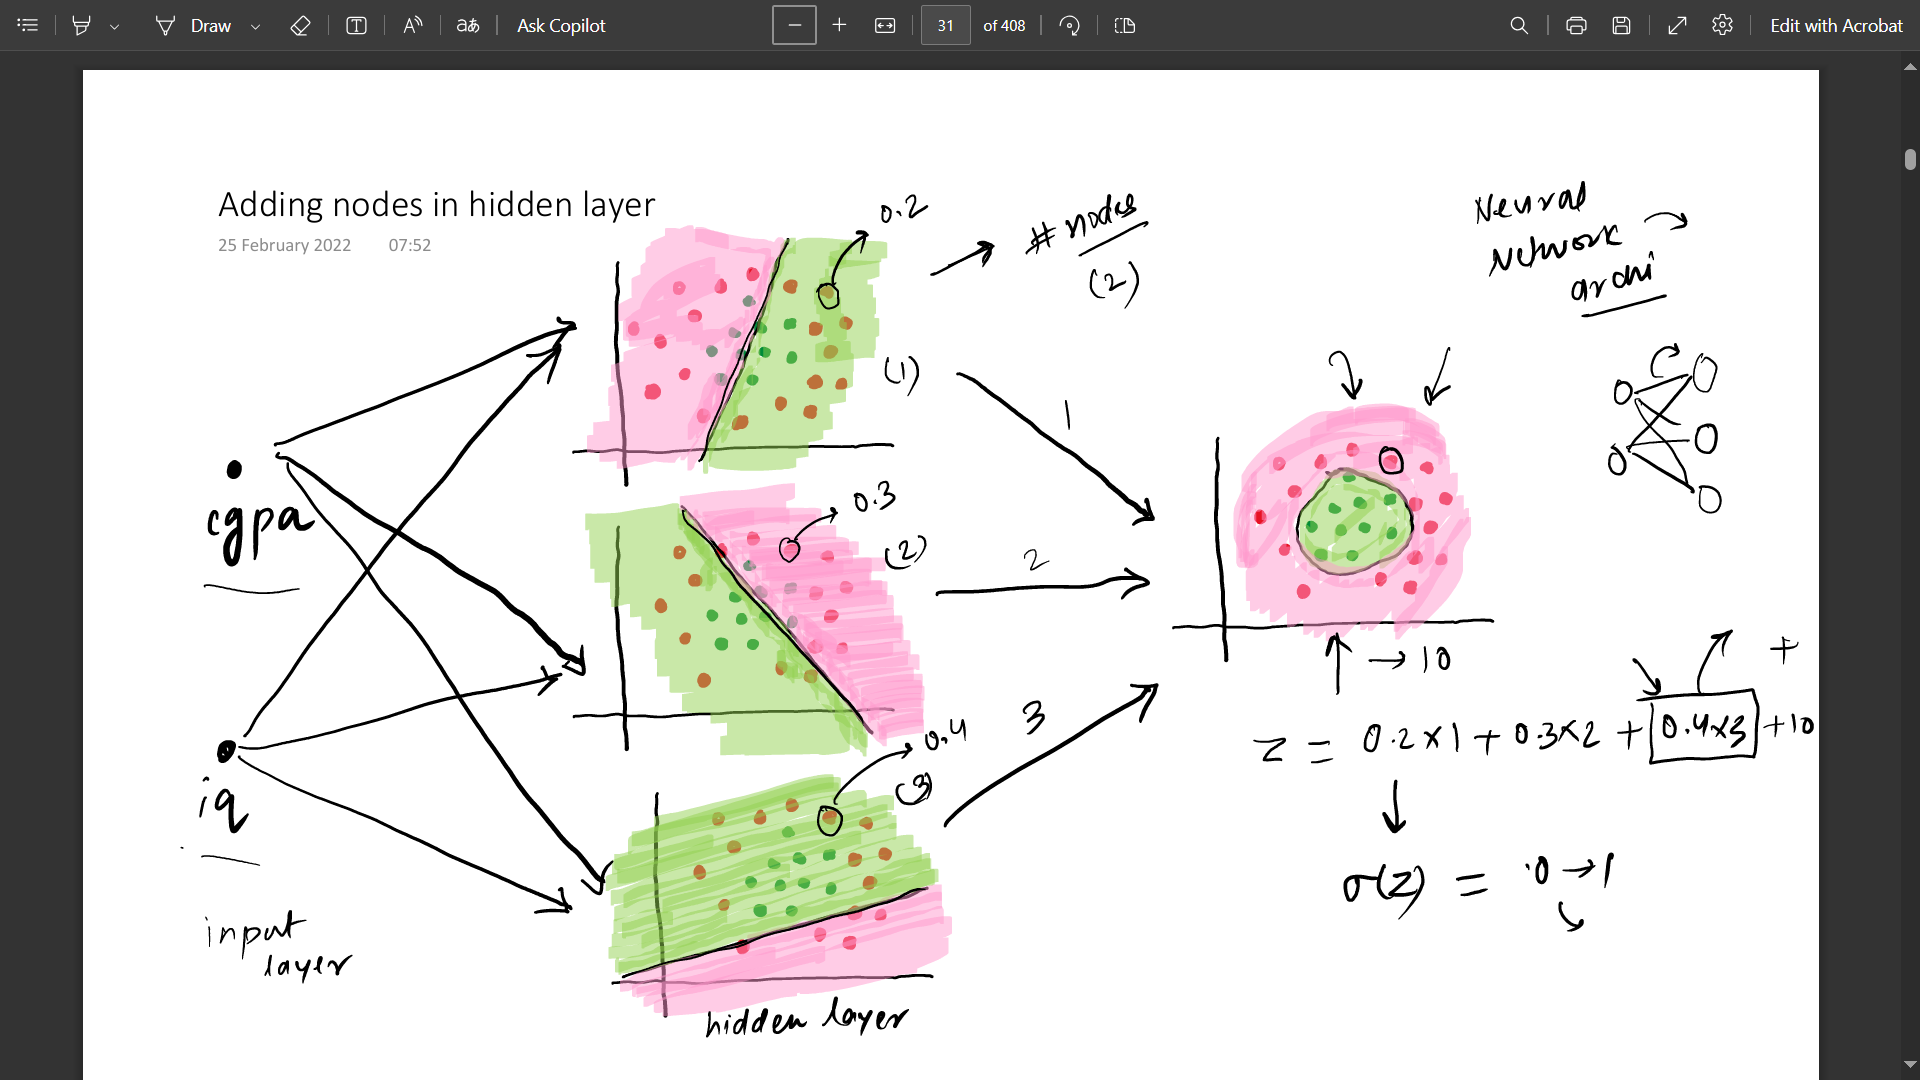

more node you add, you can solve more complex problem.

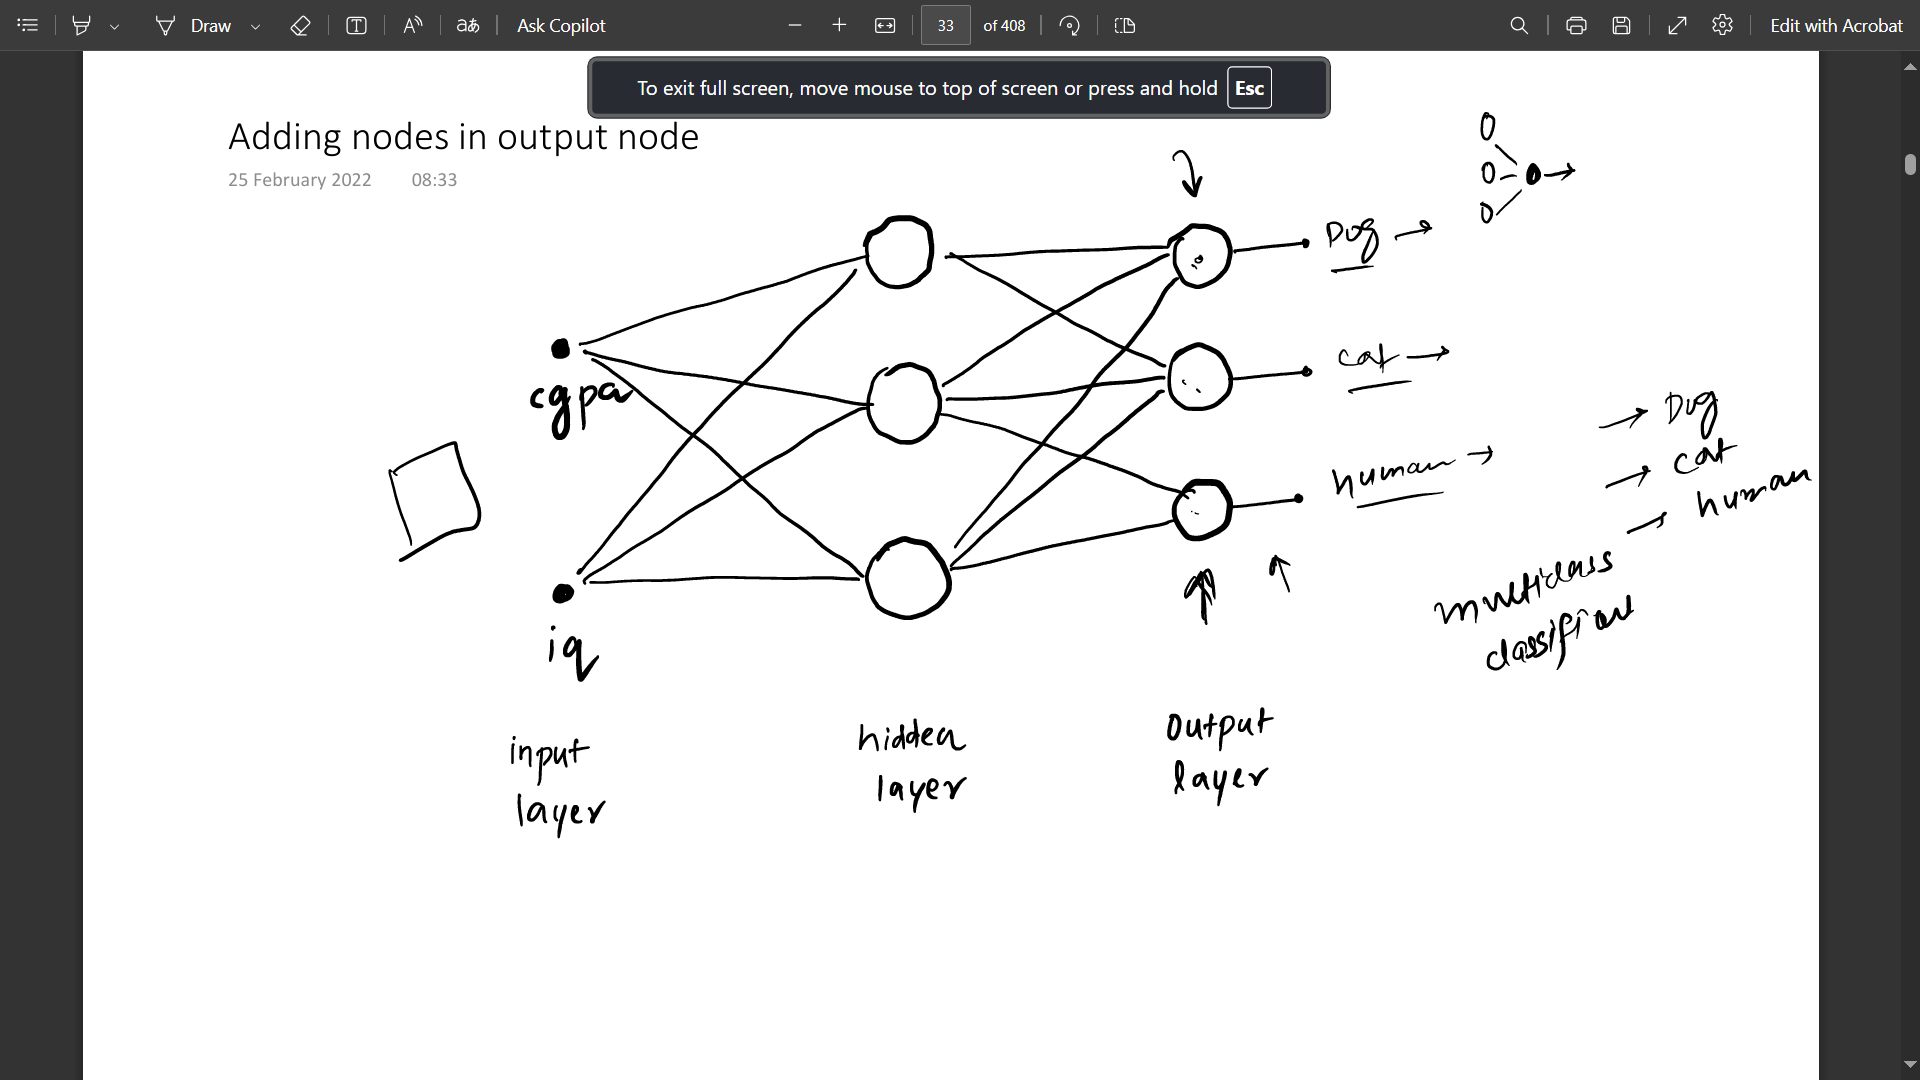

You can add multiple output layer. This is use for multi-class classification. In which it has higher probablity will be predicated as true.

we can increase the hidden layer also for more complex.

We can slove any mathamatical function from NN.

trainble parameter in MLP is weights and bias.

number of weight =number of previous * number of current node

number of bias= number of current node

**Denotation**

bij = bias, where i = layer number and j =node number

wij^k = weight, where k = entering layer, i= current layer which node number it is taken out, j = which layer node it is entering

oij= output, where i = layer and j = node number

**MNIST Dataset**

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
#28 * 28 = 784
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0] #first image shape

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

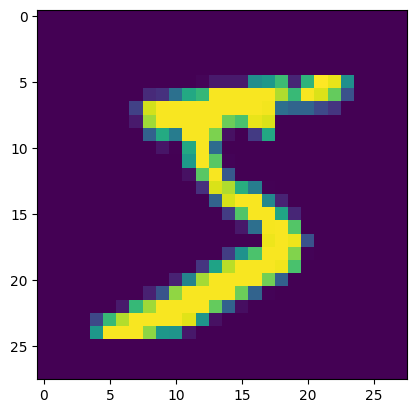

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [ ]:
# if values are in similar range then it is easy to find weights
#to make number in similar range 0 or 1. 0/255,  199/255 = 1(roundup)
X_train = X_train/255
X_test = X_test/255

In [ ]:
# ANN model
model = Sequential()
model.add(Flatten(input_shape=(28,28))) #input value changing 2D to 1D using flatten 28*28 = 784 inputs
model.add(Dense(128, activation='relu')) #hidden
model.add(Dense(32, activation='relu')) #hidden
model.add(Dense(10, activation='softmax')) #output use softmax if there is more than two classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) # prepares the model for training by linking it to the chosen optimizer and loss calculation
# difference bewten sparse_categorical_crossentropy and categorical_crossentropy is we donot need to do one hot encoding in categorical data in sparse_categorical_crossentropy
# Adam is best


In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2) # 20% data is use for validation

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8548 - loss: 0.4875 - val_accuracy: 0.9555 - val_loss: 0.1506
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9611 - loss: 0.1287 - val_accuracy: 0.9639 - val_loss: 0.1179
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9751 - loss: 0.0834 - val_accuracy: 0.9709 - val_loss: 0.0922
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9818 - loss: 0.0579 - val_accuracy: 0.9725 - val_loss: 0.0914
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9865 - loss: 0.0426 - val_accuracy: 0.9728 - val_loss: 0.0911
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9887 - loss: 0.0359 - val_accuracy: 0.9745 - val_loss: 0.0930
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9911 - loss: 0.0291 - val_accuracy: 0.9714 - val_loss: 0.1051
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9928 - loss: 0.0229 

In [ ]:
y_prob=model.predict(X_test) # value is in 10 probablity

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.974

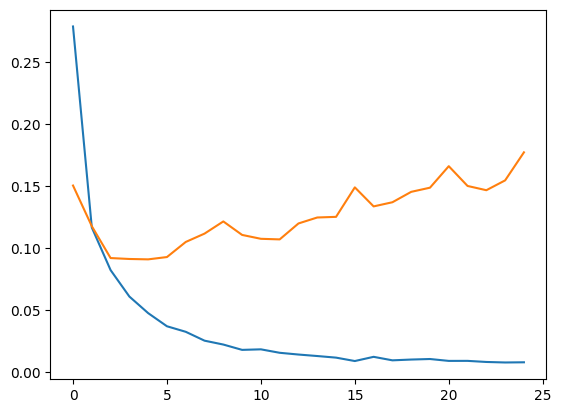

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

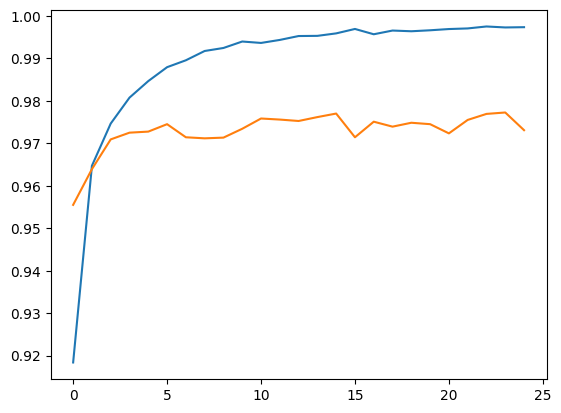

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

**Regression Problem**

In [ ]:
model.add(Dense(1, activation = 'linear')) # for regression output regression need to linear

# Loss Function

Loss function is a method of evaluationg how well your algorithm is modelling your dataset.

lower loss function more better model performing



**Why loss function important?**

to measure improvement. loss function is eye of ML algorithm.

**Loss funtion in DL?**

first w and b value is initalize and try to predict value doing forward prop. Then, after the error is calculated that is loss function. Depending upon the loss function we adjust the weight and bias using gradient descent. again we pick another data and do forward prop and repeat same process of backward prop.

Regression = MSE, MAE, nuber loss

Classification = binary crossentropy, categorical cross entropy, hing loss

Autoencoders = KL divergence

GAN = discriminator loss, minmax gan loss

object detection = focal loss

embedding = triples loss


**Loss function vs cost function**

loss function is taken out in single training data while cost function is when you taken out of whole batch

1. MSE: L = (Yi - Yi hat)^2 , C = 1/n E (Yi - Yi hat)^2

change is weight and bias are more drastic when error is high and change by little when error is less. This is since it is square error

to use MSE last(ouput layer) activition function need to be linear in DL
Adv:
- easy to interprt
- differentiable
- 1 local minima

Dis:
- error unit is square
- not robust to outliers

2. MAE: L = |Yi - Yi hat| , C = 1/n E |Yi - Yi hat|

Adv:
- easy to understand
- same unit
- robust to outliers

Dis:
- not differentiable (canot use GD directly, need to use sub-GD)

3. Huber loss:

L = { 1/2(Y - Y hat)^2  for |Y-Y hat| <= delta}
{ delta|TY - Y hat| - 1/2 delta^2 other wise}

when there is outlier it act as mae and when there is no outlier then it act as mse

4. Binary Cross Entropy(logloss):

L = -ylog(y hat) - (1-y) log(1-yhat)

C= -1/n[E L]

activation function need to sigmoid at output layer

use in classification with 2 class

Adv:
- differentiable

dis:
- not stright forward
- many local minima

5. Categorical Cross Entropy:

L= -E j=1 to k Yj log(Yj hat) , where k is number of classes

C= -1/n [E i=1 to n [E j=1 to k Yj log(Yj hat] ] n = number of data in dataset
number of neuron in ouput layer= number of class

activaion function need to be softmax at output layer

use for multi class

6. Sparse Categorical Cross-entropy:

we do OHE in categotical cross entropy to  Y but SCCE make interger

faster than CCE.

# Forward Propagation

If we have input and we have weight and bias of neural network then to predict the output of that input we use forward propagation.

How NN predict?

-> linear algebra behind the scenes handle. we just need to understand the flow.

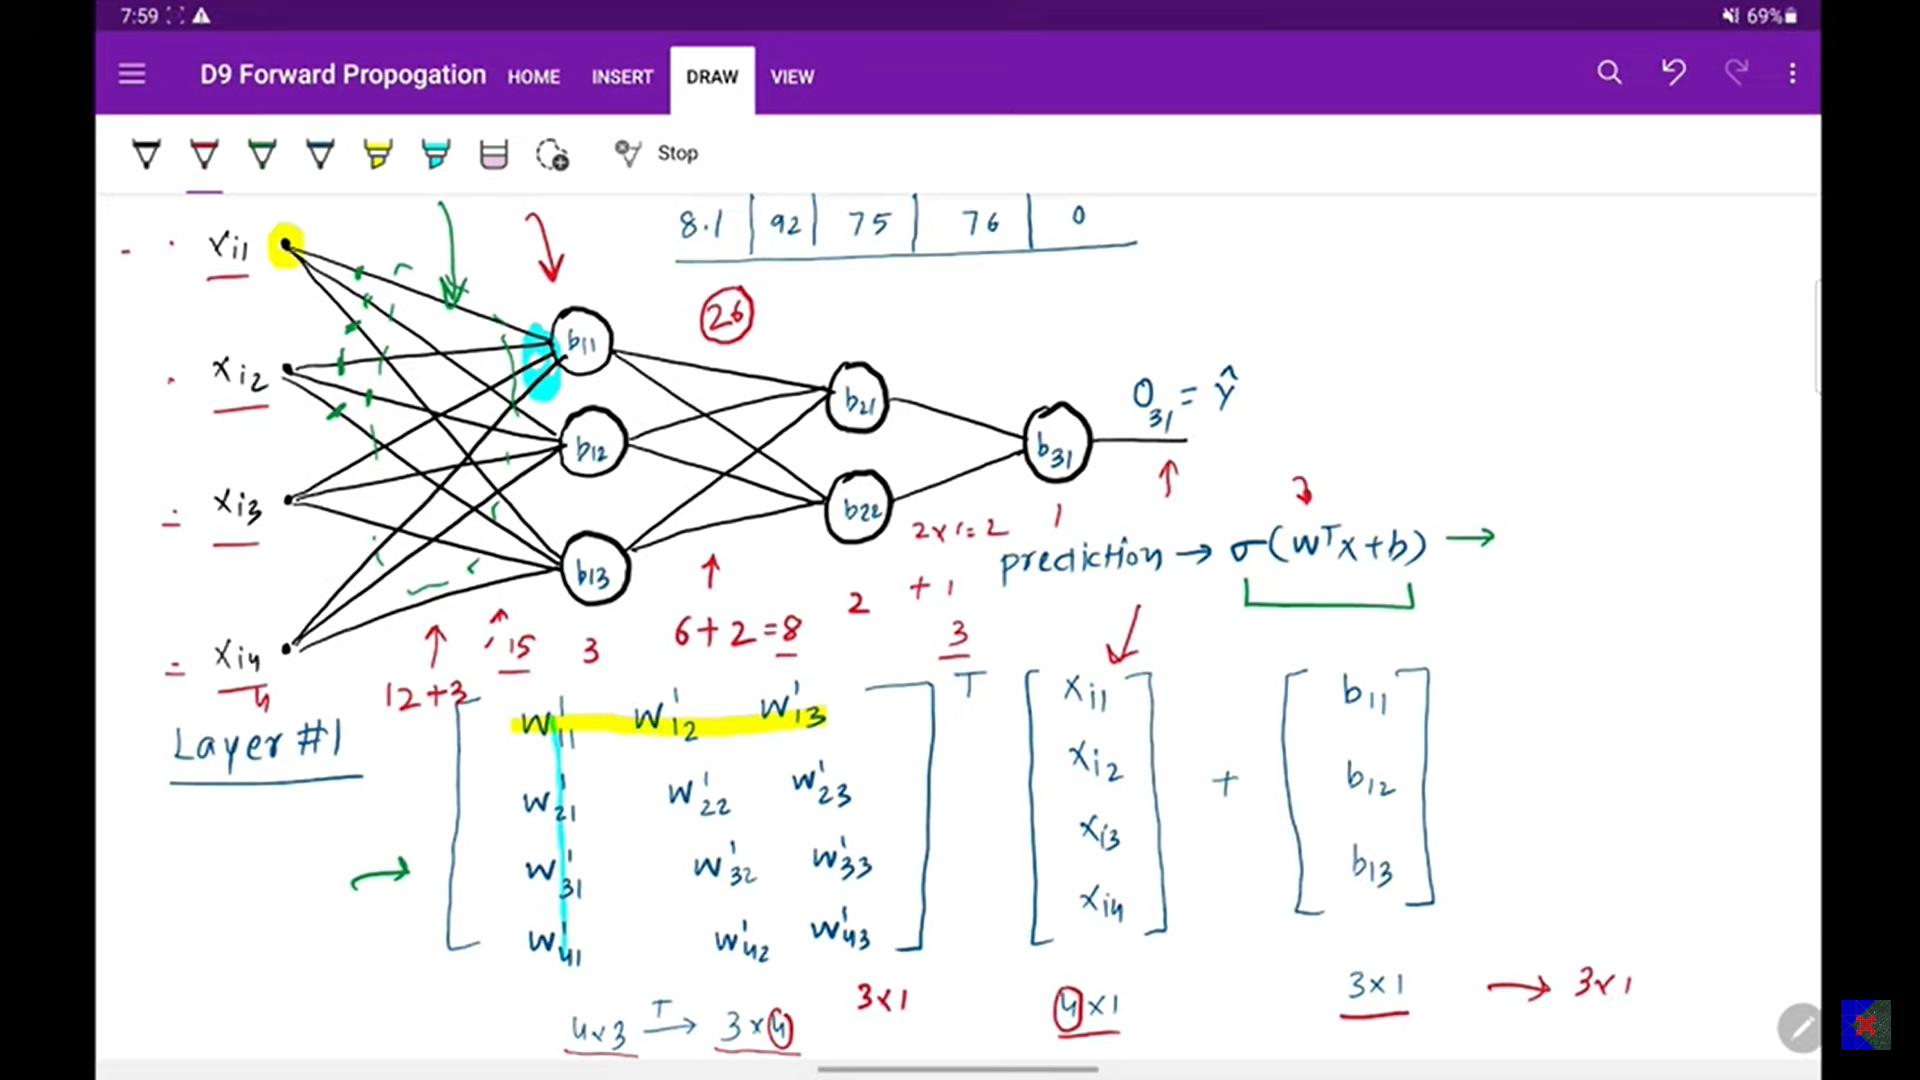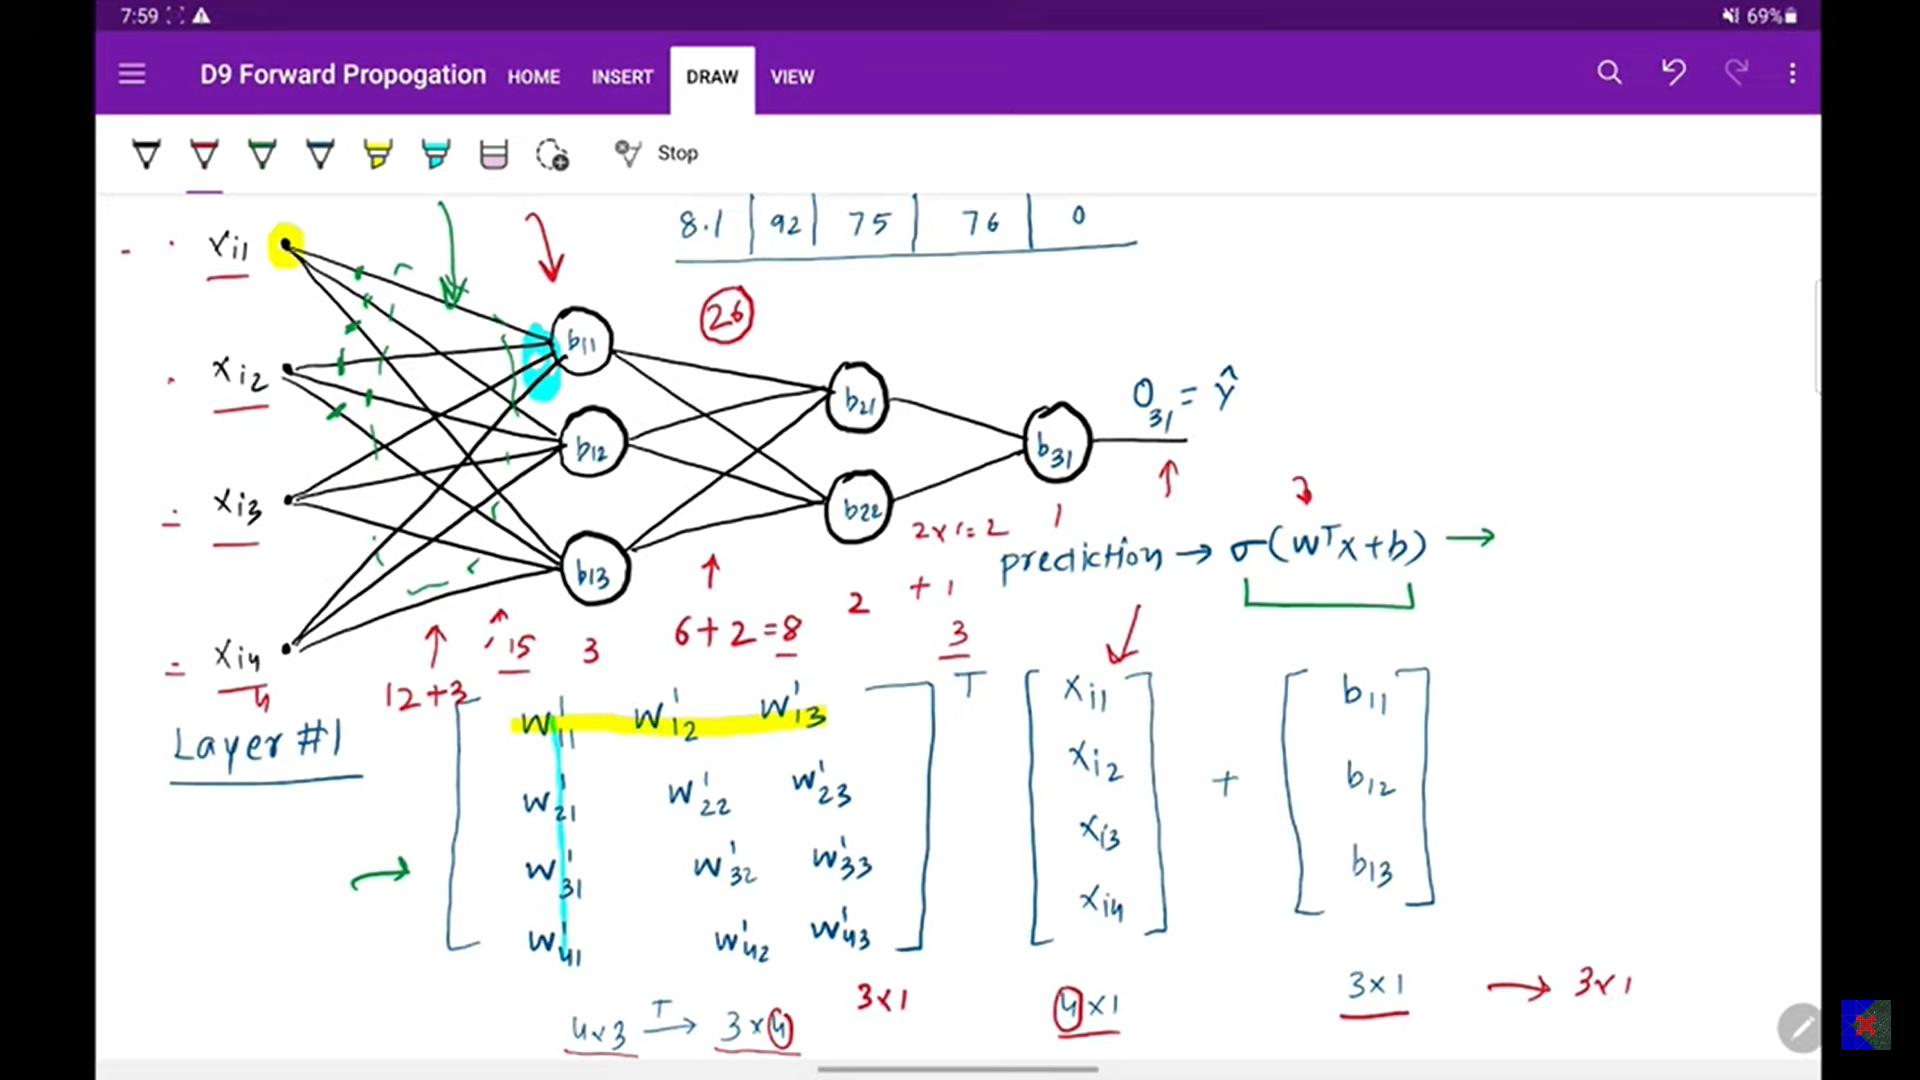

prediction = sigmoid(w^k X + b)

perdict = W ^T  X + B

T transpose.

in first layer

input = a^[0] , weight = w^[1], bias = b^[1]

output from first layer =a^[1] = sigmoid(a^[0] w^[1] + b^[1])

output from second layer =a^[2] = sigmoid(a^[1] w^[2] + b^[2])

output from third layer =a^[3] = sigmoid(a^[2] w^[3] + b^[3])

This

ouput = a^[3] = sigmoid(sigmoid(sigmoid(a^[0] w^[1] + b^[1])w^[2] + b^[2])w^[3] + b^[3])



# Back Propagation

Back Propagation is an algorithm for supervised learning of artifical neural networks using gradient descent. Given an ANN and an error function, the method calculates the gradient of the error function with respect to the NN's weights

It is an algorithm to train NN

What is training NN? -> to find the correct(optimum) value of weights and bias of NN according to data

How can you find correct weighta snd bias? ->
0. init w and b
1. you select a point (a row of data x)
2. we predict the y of that x using that w and b. This is called forward propagation
3. Choose a loss function(L) and find it. we get error
4. Since output(y) is depend upon the output layer. output layer will have weight and bias output of previous hidden layer. weight and bias can be change. previous layer also have weight and bias and output of other. it reach to input data. where we can only be weights and bias of of NN. So, the error depend on weights and bias.
5. we need to update weights and bias using Gradient Descent.

  Wnew = Wold - lr (dL/ dWold)

  bnew = bold - lr (dL/ dbold)

  this is partial derivative is gradient descent.

  derivative of loss wrt weight = dL/ dWold

  derivative of loss wrt bias = dL/ dbold

How to calculated partial derivative? ->

dL/ dWold = this means if we make small change in W then what change in L will make? changes in W will be indirectly reflect in L. This means when change in W, Yhat will be change which means it effect on L

For last output layer:

dL/ dW = (dL/dYhat) * (dYhat/dW) this is a chain rule of derivation

if L is mse then

dL/dYhat = d(Y-Yhat)^2 /dYhat = -2(Y-Yhat)

dYhat/dW = d[OW +b]/dW = O, O is output of previous layer NN

dL/ dW = -2(Y - Yhat)O


we know, dL/ db = (dL/dYhat) * (dYhat/db)

(dL/dYhat) = -2(Y - Yhat)

(dYhat/db) = 1

 dL/ db = -2(Y - Yhat)


 For hidden layer:

 dL/ dW = (dL/dYhat) * (dYhat/dOprev) * (dOprev/dW) = -2(Y - Yhat)W * Xii, weight this NN give, i = data row enter, j is column

 dL/ db = (dL/dYhat) * (dYhat/dOprev) * (dOprev/db) = 2(Y - Yhat)W, weight this NN give

Back pro algo

0. init weight and bias
1. epoch:
    for i in range(n): n = number of data
    
    1a. forward prop = predict

    1b. loss calc

    1c. adjust weight and bias

    calculate avg loss for the epoch

**Regression**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])

In [ ]:
df

cgpa  profile_score  lpa
0     8              8    4
1     7              9    5
2     6             10    6
3     5             12    7

In [ ]:
def initialize_parameters(layer_dims):

  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))


  return parameters

In [ ]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [ ]:
def linear_forward(A_prev, W, b):

  Z = np.dot(W.T, A_prev) + b

  return Z

In [ ]:
# Forward Prop
def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network

  for l in range(1, L+1):
    A_prev = A
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    print("A"+str(l-1)+": ", A_prev)
    print("W"+str(l)+": ", Wl)
    print("b"+str(l)+": ", bl)
    print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    print("A"+str(l)+": ", A)
    print("**"*20)

  return A,A_prev

In [ ]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X, parameters)

In [ ]:
y_hat = y_hat[0][0]

In [ ]:
A1

array([[1.6],
       [1.6]])

In [ ]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [ ]:
update_parameters(parameters,y,y_hat,A1,X)

In [ ]:
parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [ ]:
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[3][0]

y_hat,A1 = L_layer_forward(X, parameters)

In [ ]:
parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [ ]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [ ]:
X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[2][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.11519626, 0.12093952],
        [0.11519626, 0.12093952]]),
 'b1': array([[0.00225849],
        [0.00225849]]),
 'W2': array([[0.13054152],
        [0.13054152]]),
 'b2': array([[0.14154043]])}

In [ ]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 5

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['lpa']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append((y-y_hat)**2)

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  25.321744156025517
Epoch -  2 Loss -  18.320004165722047
Epoch -  3 Loss -  9.473661050729628
Epoch -  4 Loss -  3.2520938634031613
Epoch -  5 Loss -  1.3407132589299962


{'W1': array([[0.26507636, 0.38558861],
        [0.27800387, 0.40980287]]),
 'b1': array([[0.02749056],
        [0.02974394]]),
 'W2': array([[0.41165744],
        [0.48302736]]),
 'b2': array([[0.48646246]])}

**using keras**

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(2, activation='linear', input_dim=2))
model.add(Dense(1, activation='linear')) #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.get_weights() # generate random weights. you can set weight mannual .set_weights()

[array([[-1.2136979 , -1.2155243 ],
        [-0.32736307,  1.0974635 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.2260772 ],
        [0.34126508]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [ ]:
model.fit(df.iloc[:,0:-1].values, df['lpa'].values, epochs=75, verbose=1, batch_size=1) #75 epoch

Epoch 1/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 320.4230
Epoch 2/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 332.8826  
Epoch 3/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 329.0659 
Epoch 4/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 313.9726 
Epoch 5/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 308.3740 
Epoch 6/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 299.5929  
Epoch 7/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 283.0594 
Epoch 8/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 291.9875 
Epoch 9/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 282.6065 
Epoch 10/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 288.4689 
Epoch 11/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 272.9323 
Epoch 12/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 280.1617 
Epoch 13/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 246.6569  
Epoch 14/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 266.2450  
Epoch 15/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 242.8916 


In [ ]:
model.get_weights() #final weight

[array([[-0.9809351, -0.9375439],
        [-0.0910053,  1.3802803]], dtype=float32),
 array([0.23757875, 0.2839934 ], dtype=float32),
 array([[1.0035063],
        [0.5928598]], dtype=float32),
 array([0.24956745], dtype=float32)]

**Classification**

Loss function L = -ylog(yhat) - (1-y) log(1-yhat)

dL/dW = dL/dyhat * dyhat/dZ * dZ/dW =-(y-yhat)Output_perv

dL/dW = -(y-yhat)


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame([[8,8,1],[7,9,1],[6,10,0],[5,5,0]], columns=['cgpa', 'profile_score', 'placed'])

In [ ]:
df.head()

cgpa  profile_score  placed
0     8              8       1
1     7              9       1
2     6             10       0
3     5              5       0

In [ ]:
def initialize_parameters(layer_dims):

  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))


  return parameters

In [ ]:
# Utility Functions
def sigmoid(Z):

  A = 1/(1+np.exp(-Z))

  return A

In [ ]:
def linear_forward(A_prev, W, b):

  Z = np.dot(W.T, A_prev) + b

  A = sigmoid(Z)

  return A

In [ ]:
# L-layer feed forward

def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network

  for l in range(1, L+1):
    A_prev = A
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)

  return A,A_prev


In [ ]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.0001 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0]))

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0]))

In [ ]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters


Loss for this student -  0.613402628898913


{'W1': array([[0.10000513, 0.10000513],
        [0.10000513, 0.10000513]]),
 'b1': array([[6.41054186e-07],
        [6.41054186e-07]]),
 'W2': array([[0.10003815],
        [0.10003815]]),
 'b2': array([[0.100084]])}

In [ ]:
X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[1][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.568725622654268


{'W1': array([[0.10000937, 0.10001059],
        [0.10000937, 0.10001059]]),
 'b1': array([[1.24770113e-06],
        [1.24770113e-06]]),
 'W2': array([[0.10007424],
        [0.10007424]]),
 'b2': array([[0.10011761]])}

In [ ]:
X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[2][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.8353333695154365


{'W1': array([[0.10000463, 0.10000267],
        [0.10000463, 0.10000267]]),
 'b1': array([[4.56125378e-07],
        [4.56135584e-07]]),
 'W2': array([[0.10002712],
        [0.10002712]]),
 'b2': array([[0.09997049]])}

In [ ]:
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[3][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.8238180133031612


{'W1': array([[0.09999911, 0.09999716],
        [0.09999911, 0.09999716]]),
 'b1': array([[-6.47175329e-07],
        [-6.47175081e-07]]),
 'W2': array([[0.09998609],
        [0.09998609]]),
 'b2': array([[0.09992997]])}

In [ ]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 50

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['placed']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  0.7103199085929446
Epoch -  2 Loss -  0.6991702892802629
Epoch -  3 Loss -  0.6991679314811485
Epoch -  4 Loss -  0.6991655746710999
Epoch -  5 Loss -  0.6991632188496667
Epoch -  6 Loss -  0.699160864016399
Epoch -  7 Loss -  0.6991585101708473
Epoch -  8 Loss -  0.6991561573125619
Epoch -  9 Loss -  0.6991538054410936
Epoch -  10 Loss -  0.6991514545559935
Epoch -  11 Loss -  0.6991491046568126
Epoch -  12 Loss -  0.6991467557431024
Epoch -  13 Loss -  0.6991444078144144
Epoch -  14 Loss -  0.6991420608703007
Epoch -  15 Loss -  0.6991397149103132
Epoch -  16 Loss -  0.6991373699340042
Epoch -  17 Loss -  0.6991350259409265
Epoch -  18 Loss -  0.6991326829306324
Epoch -  19 Loss -  0.6991303409026751
Epoch -  20 Loss -  0.699127999856608
Epoch -  21 Loss -  0.6991256597919842
Epoch -  22 Loss -  0.6991233207083575
Epoch -  23 Loss -  0.6991209826052818
Epoch -  24 Loss -  0.699118645482311
Epoch -  25 Loss -  0.6991163093389996
Epoch -  26 Loss -  0.699113974174902

{'W1': array([[0.09994267, 0.09984548],
        [0.09994272, 0.09984548]]),
 'b1': array([[-3.38405750e-05],
        [-3.38419977e-05]]),
 'W2': array([[0.09920806],
        [0.09920816]]),
 'b2': array([[0.09915209]])}

**using keras**

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(2, activation='sigmoid', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.get_weights()

[array([[ 0.1523546 ,  0.59367824],
        [-1.2222068 , -0.54093856]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.96835744],
        [-0.07646787]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="binary_crossentropy", optimizer=optimizer)

In [ ]:
model.fit(df.iloc[:,0:-1].values, df['placed'].values, epochs=75, verbose=1, batch_size=1)

Epoch 1/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.7039
Epoch 2/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6888  
Epoch 3/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7038 
Epoch 4/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6912  
Epoch 5/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6887  
Epoch 6/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6969  
Epoch 7/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7002  
Epoch 8/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6958
Epoch 9/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7017 
Epoch 10/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6981 
Epoch 11/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6994  
Epoch 12/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6886  
Epoch 13/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6959  
Epoch 14/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6999 
Epoch 15/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7014 
Epoch 16/75
4/4 ━━━━━━━━━━━

In [ ]:
model.get_weights()

[array([[ 0.05092743,  0.5208801 ],
        [-1.3234198 , -0.60805064]], dtype=float32),
 array([-0.10395357, -0.03239272], dtype=float32),
 array([[ 0.8611397 ],
        [-0.05067139]], dtype=float32),
 array([0.00357284], dtype=float32)]

Why Wnew = Wold - lr dL/dW works?

-> Loss function is a function of all trainable parameters

For mse = (y - yhat)^2

L(?) = (y - yhat)^2, since y is constant then L(yhat)

yhat = WO + WO + b

yhat = W[WX + WX + b] + W[WX + WX +b] + b

since X is constant then we know that W and b is variable.

If we change W and b then L will be change. We have to change the value of W and b in a way that we can make L value minimum.

**Concept of Gradient Descent**

It is derivative.

Y = f(X) = X^2 + X

derivative = dY/dX = d(f(X))/dX = d(X^2 + X)/dX= 2X+1

here Y is depend on X.

sometime derivative depend on more than one variable.

f(x,y)= x^2 + y^2 then

dz/dx =2x, dz/dy=2y

d/dx is gradient

L(W,b) is complex. dL/dw, dL/db is gradient. This is we are calculating slope with respect to W and b.


**Concept of Derivative**

derivate at a point. Derivative is the rate of change.

dy/dx. since y depend on x. if we change in x, corresponding changes will be shown in y.

for eg dy/dx = 2 then if we change 1 unit in x then we will get change 2 unit in y


if y = x^2 then we have to find x=5 what is the derivative.

dy/dx = 2x at x=5 then dy/dx=2*5= 10

this means dy/dx at x=5 is 10. the slope of this dy/dx at x =5 is 10

**Concept of Minima**

to find minima we do derivate=0

for eg: dy/dx=0, y= x^2 then dy/dx =0 => dy/dx = 2x =0 this means when x=0 then 2x= 0

what if z= x^2 + y^2 for minimum z we do

dz/dx=0 => d(x^2 + y^2)/dx=0 => 2x=0=> when x=0 then dz/dx=0, x=0 give minimum

dz/dy=0 => d(x^2 + y^2)/dy=0 => 2y=0=> when y=0 then dz/dy=0, y=0 give minimum

so , know now when x and y both are 0 then z is minimum

**Intuition of Backpropagation**

Wnew = Wold - lr dL/dW

bnew = bold - lr dL/d

lets consider lr=1 then

bnew = bold - dL/db

we are subtracting with dL/db.-> we want such a b value which will give L minimum. when dL/db is postive then this means when we increse b then L also increase. So that means we need to subtract. when dL/db is negative then this means when we increse b then L decrease. so that measn we need to add. In this case - * - will turn +. We add

- dL/db this is the negative of gradient.

How much should we go mean neg direction slope value is the value we need to go negative side.

why lr? Lr make step smoooth while checking the slope. because lr make step small. so this also help in case of missing chance of minimum.




What is convergence?

-> Wnew= Wold-lr dL/dw=0 . This means weare reaching minima

# Memorization

an optimization techinque used primiary to speed up computer programs by storing the results of expernsive function calls and returning the cached result when the same inputs occur again.


In [ ]:
#fib
def fib(n):
  if n==1 or n==0:
    print("1")
    return 1
  else:
    print(n)
    return fib(n-1) + fib(n-2)

In [ ]:
import time
start = time.time()
fib(5)
end = time.time()
print(end-start)

5
4
3
2
1
1
1
2
1
1
3
2
1
1
1
0.0013117790222167969


To improve the computational time we use memoization.

In [ ]:
#fib
def fib(n,d):
  if n in d:
    print("from dictionary")
    return d[n]
  else:
    print(n)
    d[n] = fib(n-1,d) + fib(n-2,d)
    return d[n]

In [ ]:
import time
start = time.time()
d={0:1, 1:1} # create dict to save thing that has happen
fib(5,d)
end = time.time()
print(end-start)

5
4
3
2
from dictionary
from dictionary
from dictionary
from dictionary
from dictionary
0.001005411148071289


Backprop is combination of chain diff rule plus Memorization

here, it save thing that are calculated previous and just get call when need.

# Gradient Descent

It is most common way to optimize NN.

GD is a way to minimize an objective function (our loss function) J(theta) parameterized by a model's parameters "theta E Rd" by updating the parameters in the opposite direction of the gradient of the objective function "delt theta J(theta)" w.r.t. to the parameters. The learning rate determines the size of the steps we take to reach a (local) minimum. In other words, we follow the direction of the slope of the surface created by the objective function downhill untill we reach a valley.

There are three variants of GD, which differ in how much data we use to compute the gradient of the objective function. Depending on the amount of data, we make a trade-off between the accuracy of the parameter update and the time it takes to perform an update.

## Batch GD

you take entire data set and you make update.

If you take 50 data point then you make all 50 prediction and calulate loss of it. Then you make single update. For example if you have 5 epoch then you will update only 5 times weight and bias.


psudo-code: total data=50

epoch= 10

for in range(epoch):

    y_hat = np.dot(X, W) + b # this has 50 values

    y= 50 values

    we calculate loss

    and then we update weight and bias

total weight and bias update is 10 since epoch is 10

## Stochastic GD

epoch = 10

for i in range(epoch):

    we shuffle
    for i in range(x.shape[0]): # this means if you have 50 data then this will run 50 time in this inside loop
      take one random point
      we do forward and predict
      we calc loss
      update weight and bias

    calculate avg. loss of this epoch

if we have 10 epoch and 50 data then we will update weight and bias 50*10=500 times.



model.fit(X_train, y_train, epochs=10, batch_size =1) # when batch =1 then it is stochastic GD

model.fit(X_train, y_train, epochs=10, batch_size = 50) # when batch_size is equal to total number of data then it is batch GD

faster in completing operation is batch and more accurate and faster reach to solution is stochastic if we do same number of epoch

in stochastic loss function decrease in unstable manner since it pick only one random data once and change weight and bias whereas in batch it calculte loss to all data and make change in weight and bias so it look smooth

SGD can get out of local minima where batch cannot dur to random selection of data it spikey

vectorization also the reason batch is fast y_hat = np.dot(X, W) + b . but it has downside that is if we have very big data we need to load whole data at once which memory cannot have space at a time.

## Mini batch GD

best of both.

for i in epochs:

    np.random.shuffle(data)
    for j in number of batch:
      we take 1 batch
      make y_pred that is forward using verctorization
      loss calc
      update weight and bias



model.fit(X_train, y_train, epochs=10, batch_size = 50) # when batch_size is less than total number of data then it is mini-batch GD

why batch size is provided in multiple of 2? -> this is effective use of RAM.

what if data is ds not perfectly divide batch_size? for example: data is 200 and batch_size is 150 then in first batch it will perfrom will 150 and second time it will perform with 50.

# Vanishing Gradient Problem

It is a villan. If this problem occur, you wont able to train the model.

In machine learning, the vanishing gradient problem is encountered when training neural networks with gradient-based learning methods and backpropagation. In such methods, during each training iteration, each neural network weight receives an update proportional to the partial derivative of the loss function with respect to the current weight.  The problem is that as the network depth or sequence length increases, the gradient magnitude typically is expected to decrease (or grow uncontrollably), slowing the training process. In the worst case, this may completely stop the neural network from further learning

this happens when:
1. math law: if we multiple smaller number then the value become more smaller. for eg: 0.1*0.1*0.1=0.001
2. it occur in deep NN where we have may hidden layer
3.  sigmod/tanh as activation function



For example: dL/dw = 0.0001, lr=0.01 and Wold=1 then Wnew= Wold-lr dL/dw=1- 0.01*0.0001 =0.99999. This means weight has not change by much so, Loss function will also remain unchange. Backprop will not coverge and model wont train.

It occur in sigmoid activation function because no matter how much big value it is it change between 0-1.

**How to recognize?**

1. focus on loss = if it is no change in epoch then VGP
2. weights = plot graph epoch vs weight . If it is constant or unchange then VGP


**VGP code**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)

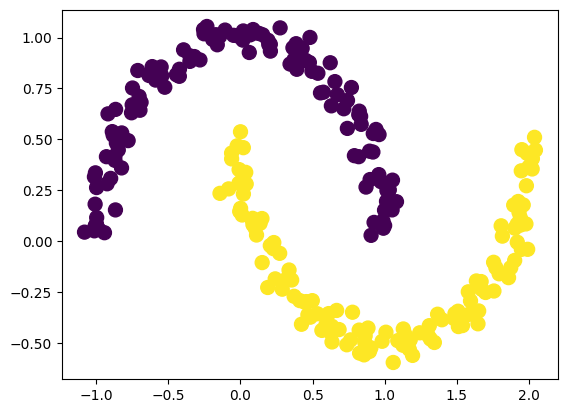

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()

In [ ]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.get_weights()[0]

array([[-0.0665679 ,  0.64556867,  0.30583686,  0.44605142,  0.23563528,
        -0.00526631,  0.20022297,  0.11216235, -0.44880256,  0.27395487],
       [-0.39674345,  0.17257434,  0.10389668,  0.6452212 , -0.09873742,
        -0.07184708,  0.5988135 , -0.49621606,  0.18759781, -0.7037952 ]],
      dtype=float32)

In [ ]:
old_weights = model.get_weights()[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4880 - loss: 0.7073
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4971 - loss: 0.6994 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4921 - loss: 0.6978 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4989 - loss: 0.6956  
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5135 - loss: 0.6930 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4801 - loss: 0.6959 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4702 - loss: 0.6956 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4900 - loss: 0.6937 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4800 - loss: 0.6937 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5171 - loss: 0.6930  
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5168 - loss: 0.6931 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5094 - lo

In [ ]:
new_weights = model.get_weights()[0]

In [ ]:
model.get_weights()[0]

array([[-0.06062445,  0.6145658 ,  0.29192594,  0.41098532,  0.20888187,
         0.04444647,  0.22100739,  0.13692586, -0.4797166 ,  0.24620734],
       [-0.40135342,  0.20187491,  0.11548855,  0.6736593 , -0.0768982 ,
        -0.11142007,  0.58249325, -0.515242  ,  0.21520582, -0.6818049 ]],
      dtype=float32)

Wnew=Wold-lr dL/dw


then, gradient dL/dw= (Wold- Wnew)/lr

In [ ]:
lr= model.optimizer.get_config()['learning_rate']

lr

0.0010000000474974513

In [ ]:
gradient = (old_weights-new_weights )/lr

In [ ]:
gradient

array([[ -5.943447,  31.002878,  13.910919,  35.066097,  26.75341 ,
        -49.712776, -20.784422, -24.763508,  30.914038,  27.747526],
       [  4.609972, -29.30057 , -11.591873, -28.43815 , -21.839216,
         39.57299 ,  16.320229,  19.02592 , -27.608006, -21.990297]],
      dtype=float32)

**How to handle vanishing gradient problem?**

1. reduce model complexity: reduce NN size because having more NN means have to calculate many derivation. But this is not applicable because we use more NN to find complex problem

2. Use different activation function like ReLU then sigmoid/ tanh: it make value to max(0,z). It means it squish neg not postive . Good this about relu is, it's derivative value is either 1 or 0 so if we have solve lot of derivative it will be 1 . It value doesnot decrease means no VGP. It has also have problem dying relu means if 0 occur in derivate then whole derivate is 0. To solve this we have leaky relu

3. Proper Weight initialization: we have technique vavier or glorat

4. batch normalization

5. using residual Network

# Improve Performance of NN

1. Fine tuning of NN hyperparamters:

hyperparameters:
- number of hidden layers
- number of nuerons per layer
- learning rate
- optimizer
- batch size
- activation function
- epochs

2. By solving problems:

- vanishing/exploding gradient
- not enough data
- slow training
- overfitting

**number of hidden layers**

many hidden layer is better than many neuron in 1 layer

premitive = 1st hidden layer will capture

hidden attach the premitive

last layer attach the shape and create overall result

so how much hidden layer is ok? we can increase hidden layer unless it is overfitting. If it is overfitting we need to stop.

having many hidden layer has another advantage that is transfer learning in CNN.For example we train with human face detection. suddenly we have to detect monkey. since human face and monkey face structure look similar so, we can reuse it.

**number of neuron in a layer**
we should have sufficent neuron because if a hidden layer unable to detect primitive thing at first it won't able to detect latter.

If have many neuron occur overfitting then only reduce otherwise no need to reduce. more is better


**Batch size:**
smaller batch size is better at generalizing result but larger batch size is faster.

In large batch, we use learning rate scheduler. This means we need to try different learning rate. When we are at beginning of epoch we need to make learning rate smaller. As the epoch increase we need to increase learning rate also. This is also called warming up lr. It is not only fast but also have good result

so, try larger if it doesnot work then do smaller batch because smaller always give good accuracy

**Epoch**
more epoch is better. but, we have a concept in keras that is "early stopping". If the result are same in epochs then it will stop.

we have to use early stopping and donot worries about epoch

**Vanishing and exploting gradient**

weight init

activation function

batch normalization

gradient clipping: it is use for exploting only

**Not enough data**

transfer learning

unsupervised pretraining

**Slow training**

optimizer

learning rate schedular

**overfitting**

l1 and l2 regularlization

dropouts

## Early Stopping

When you train more epoch than need then there is chance of overfitting.

So, no to get overfit we use concept of early stopping. It automaticly detect overfitting after you train at some point. Overfitting is doing well in train but in test accuracy is less and loss is high. It detect and stop the epoch. We use this using kears callback



In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [ ]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

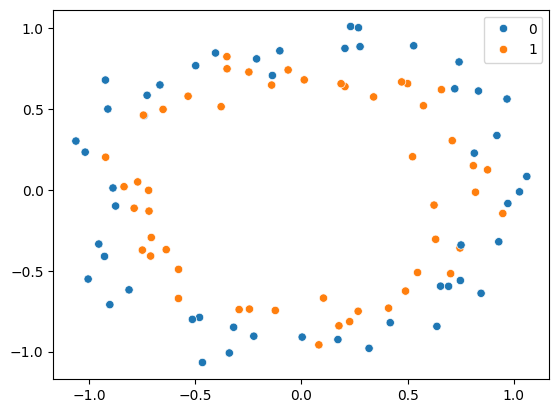

In [ ]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

Parameter:

    moniter : which quantity to monitored
    min_delta: minimun change in the monitored quantity  to qualify as an improvement. If less than this is counted as not imporovement
    patience: number of epoch with no improvement after which training is stopped
    verbose: verbose have 1(it show when did it stoped) or 0(it does not show when it stoped) value
    mode: mode has three auto(automatically monitored quantity), min(traning will stop when quantity is decrease) and max(traning will stop when quantity is increase)
    baseline: Training will stop if the model doesnot improve over the baseline
    restore_best_weights: It will restore the value of weights where it perform great means has lower loss value


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks= callback)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.8547 - loss: 0.4547 - val_accuracy: 0.7000 - val_loss: 0.6155
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8313 - loss: 0.4645 - val_accuracy: 0.7000 - val_loss: 0.6166
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8133 - loss: 0.4829 - val_accuracy: 0.6500 - val_loss: 0.6186
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8133 - loss: 0.4721 - val_accuracy: 0.6500 - val_loss: 0.6180
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8562 - loss: 0.4576 - val_accuracy: 0.7000 - val_loss: 0.6174
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8469 - loss: 0.4588 - val_accuracy: 0.6500 - val_loss: 0.6151
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8703 - loss: 0.4506 - val_accuracy: 0.7000 - val_loss: 0.6132
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8781 - loss: 0.4505 - val_accuracy: 0.7000 - val_loss

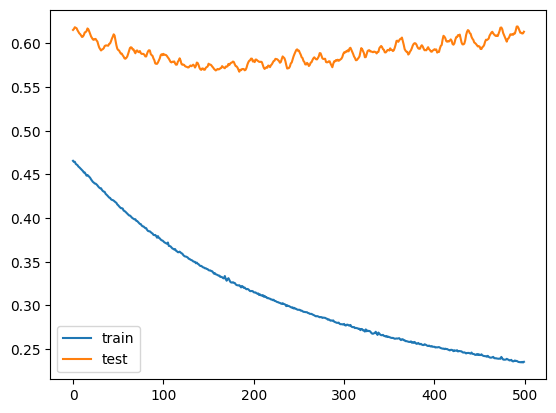

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Data Scaling(Normalizing inputs)

Range of inputs are different then NN will take long time to train. So, we need to make input in same scale so, it train faster

if your inputs are unnormalized then loss function is non-symmetrical. So, it oscillate.

if your inputs are normalized then loss function is symmetrical. So, it will travel faster to reach minimum loss.

**standarized** : Xi- Xmean/ sigma (standard derivation). value become zero centric means zero will be the center of the inputs

**normalize**: (Xi-Xmin)/(Xmax-Xmin). When we do this value will be between 0 or 1


If you know the input maximum value and minimum value then use normalize otherwise use standarized when data is normally distributed.

There is no disadvantage to use this. So, better use all the time

1. Normalization: It can be used when data does contain outliers. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if, for some reason, you don’t want 0–1 (e.g., neural networks work best with zero-mean inputs, so a range of –1 to 1 is preferable).
2. Standardization: Unlike minmax scaling, standardization does not restrict values to a specific range. However, standardization is much less affected by outliers.
3. Data with a heavy tail: When a feature’s distribution has a heavy tail (i.e., when values far from the mean are not exponentially rare), both min-max scaling and standardization will squash most values into a small range. Models generally don’t like this at all. So before you scale the feature, you should first transform it to shrink the heavy tail, and if possible to make the distribution roughly symmetrical. For example, a common way to do this for positive features with a heavy tail to the right is to replace the feature with its square root (or raise the feature to a power between 0 and 1). If the feature has a really long and heavy tail, such as a power law distribution, then replacing the feature with its logarithm may help. Another approach to handle heavy-tailed features consists in bucketizing the feature. This means chopping its distribution into roughly equal-sized buckets, and replacing each feature value with the index of the bucket it belongs to.
4. Data with multiple peaks: When a feature has a multimodal distribution (i.e., with two or more clear peaks, called modes), it can also be helpful to bucketize it, but this time treating the bucket IDs as categories, rather than as numerical values. This means that the bucket indices must be encoded, for example using a OneHotEncoder (so you usually don’t want to use too many buckets). This approach will allow the model to more easily learn different rules for different ranges of this feature value. Another approach to transforming multimodal distributions is to add a feature for each of the modes (at least the main ones). The similarity measure is typically computed using a radial basis function (RBF)—any function that depends only on the distance between the input value and a fixed point. The most commonly used RBF is the Gaussian RBF, whose output value decays exponentially as the input value moves away from the fixed point.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df = df.iloc[:,2:]
df.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [ ]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

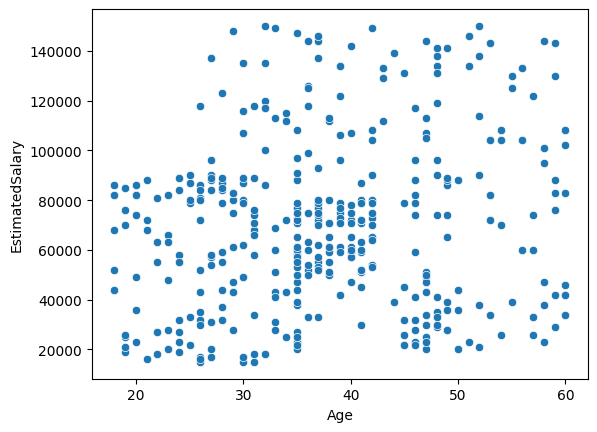

In [ ]:
sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: >

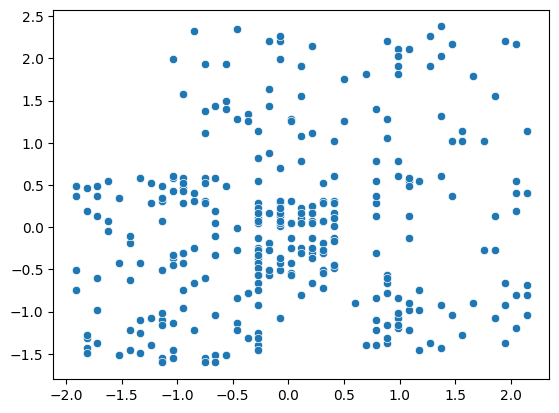

In [ ]:
sns.scatterplot(x=X_train_scaled[:,0], y=X_train_scaled[:,1])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6559 - loss: 0.6737 - val_accuracy: 0.7375 - val_loss: 0.6286
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7966 - loss: 0.6202 - val_accuracy: 0.7750 - val_loss: 0.5791
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7988 - loss: 0.5757 - val_accuracy: 0.7750 - val_loss: 0.5354
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8217 - loss: 0.5330 - val_accuracy: 0.7750 - val_loss: 0.4971
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8061 - loss: 0.5181 - val_accuracy: 0.7750 - val_loss: 0.4647
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8266 - loss: 0.4799 - val_accuracy: 0.7875 - val_loss: 0.4359
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8428 - loss: 0.4487 - val_accuracy: 0.7875 - val_loss: 0.4107
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8710 - loss: 0.4166 - val_accuracy: 0.8125 - val_loss: 

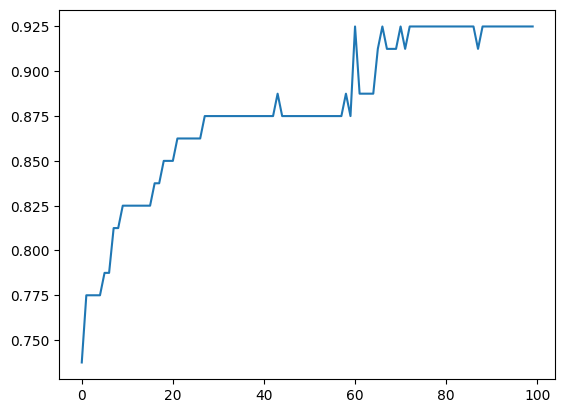

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

## Dropout layers:

we use it when overfitting



In a NN we randomly switch off some neuron and it network of different layers in each epoch.

Before each epoch we randomly switch off or ignore the neuron. We can also say that we are training with different NN in each epoch

why overfit in NN?

- since we have many nodes which try to capture small details. This why it overfit.

we can reduce the number of node for not to overfit

Instead of focusing on one data we need to focus on generalization of data.


since different node are off that means we have less  number of node and another is when the node are off they will not able to calcuate weight of it so it doesnot now depend and foucs on that data rather focus on all data. It become insensitive to data.

random forest analogy:

since we randomly switch off neuron it create unique NN each epoch. In a way we are working with ensemble learning. Similary in random forest we pick randomly some row sample or col sample of data and give it to decision tree. We have now ensemble of different DT. To predict we take majority decsion from all DT

How prediction Works?

- we use drop out in training time only not in testing time.

weight for test(W) = w(1-p), w is weight from training and p is probablity of drop out. So, this is what we use for prediction in testing.

**classification**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [ ]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dropout(0.5)) #ignore 50 %
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.7689 - loss: 0.6219 - val_accuracy: 0.5814 - val_loss: 0.6176
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8723 - loss: 0.3451 - val_accuracy: 0.5814 - val_loss: 0.8971
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8475 - loss: 0.3379 - val_accuracy: 0.7209 - val_loss: 0.5978
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8794 - loss: 0.2797 - val_accuracy: 0.8140 - val_loss: 0.3887
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9019 - loss: 0.2862 - val_accuracy: 0.8605 - val_loss: 0.3541
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8733 - loss: 0.2959 - val_accuracy: 0.7442 - val_loss: 0.4412
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8856 - loss: 0.2515 - val_accuracy: 0.8140 - val_loss: 0.4272
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9010 - loss: 0.2786 - val_accuracy: 0.8140 - val_loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


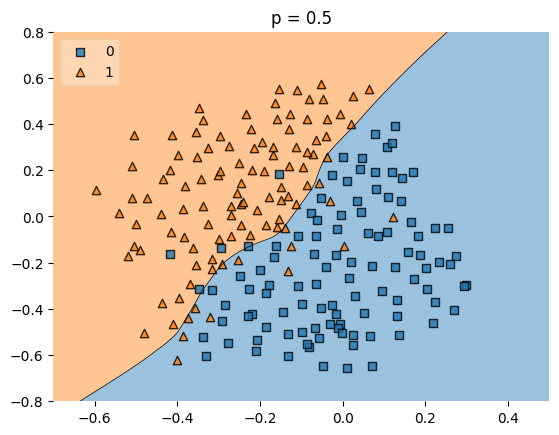

In [ ]:
from mlxtend.plotting import plot_decision_regions # Import the function
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.title('p = 0.5')
plt.show()

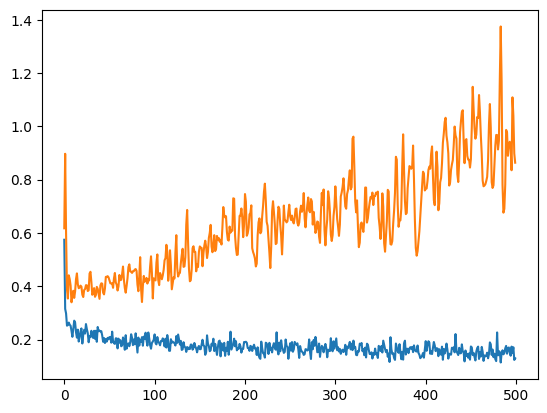

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

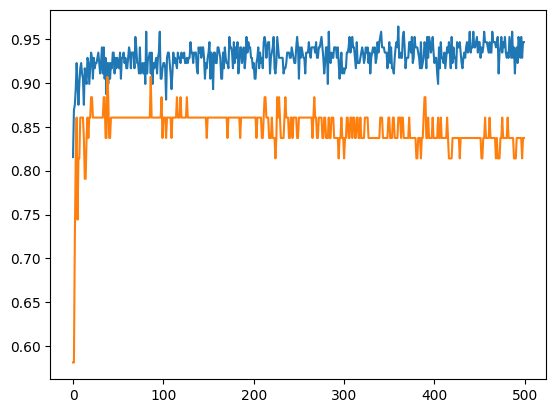

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Tips:

1. Increase p vlaue if overfitting, decrease if underfitting.
2. CNN 40-50% p better,RNN 20-30% p better
3. first try using at last layer if it is working then use in other.

Drawbacks:
1. convergenve is delay
2. loss function value changes so, if you want to debug the gradient it is difficult

## Regularization

**How NN overfit can slove?**
-> we can solve by making weight zero or close to zero of some neuron which makes that neuron like non-exist. This is want regularization.

**Ways to solve overfitting**
- add more data: add more rows, data augmentation
- reducing the complexity model: dropout, early stopping, regularization.

Regularization has three types:
1. l1
2. l2
3. l1+l2

we find weights/bias value by minimizing the loss function.

we have now in regularization:

cost function C = L(loss funcion) + penality(regu)


L1 =  (lambda / 2 n) E |w|

L2 =  (lambda / 2 n) E |w|^2

Lambda is hyperparameter. if lambda increase the penalty will increase. This means we are going from overfitting to underfitting if penalty is high.

if lamdba is 0 then no regularization. n is number of rows

C= E i=1 to n L(Yi, Yihat) + E l=1 to L E i=1 E j=1 ||Wl ij ||^2

only weight, no bias added

**How doing regularization make weight move gradually to zero?**
Wn = W0 - lr dL/dW0

L' = L + (lamdba/ 2) E ||Wi||^2

diffferencing by dW0

dL'/dW0 = dL/dW0 + (lamdba/ 2) 2*W0

= dL/dW0 + lamdbaW0 ---1

------------
Wn = W0 - lr dL'/dW0

Wn = W0 - lr(dL/dW0 + lamdbaW0) [using 1]

Wn =  (1-lr lambda) W0 - lr dL/dW0

This is same only differenve is (1- lr lamdba).

Since, lamdba is positive. W0 orginal is bigger than W0 new. So basically we are decreasing our weight.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
X, y = make_moons(100, noise=0.25,random_state=2)

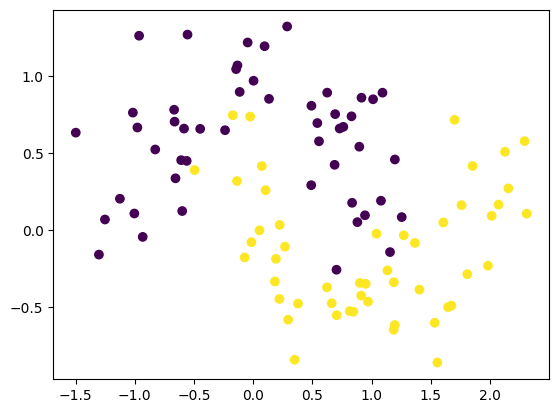

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [ ]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


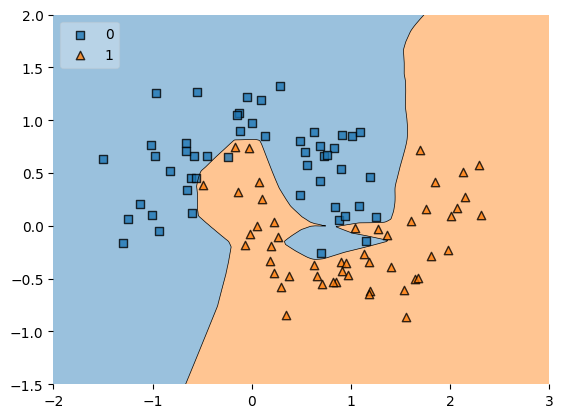

In [ ]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

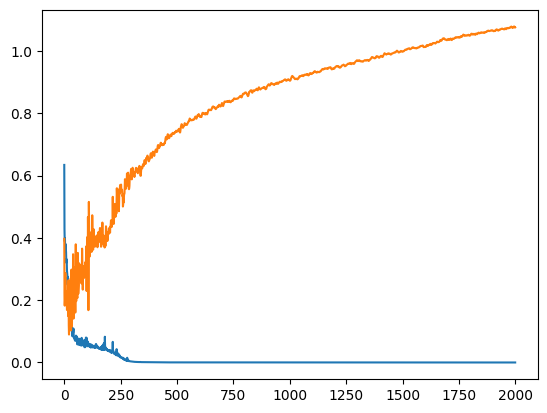

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [ ]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


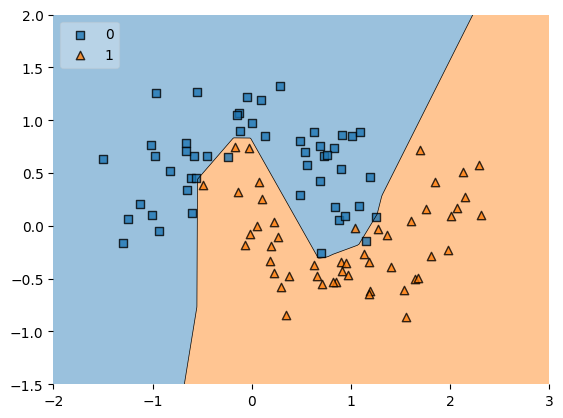

In [ ]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

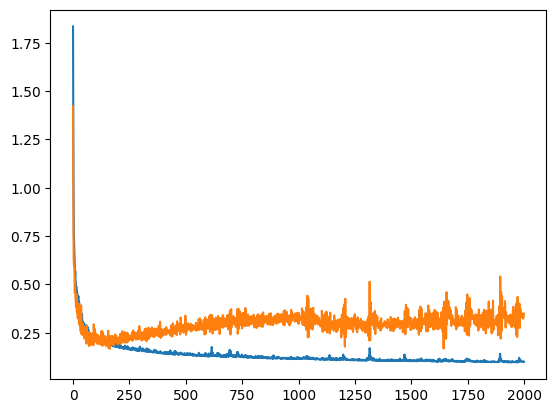

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

## Activation Function

In ANN, each neuron forms a weighted sum of its inputs and passes the resulting scalar value through a function referred to as activation function or transfer function. If a neuron has n inputs then the output or activation of a neuron is

a = g(w1x1 + w2x2 + w3x3 + ... wnxn +b)

This function g is referred to as the activation function.

It apply non-linear transformation and decide whether a neuron should be activate or not.

activation function decide whether the neuron will be active or not. If active then by how much it will active.



In linear,  g does not work

Z1 = W1A0 + b1

A1 = g(Z1)=Z1

A2 = g(W2A1 + b1)

Yhat= A2= W2A1+b2 = W2W1A0 + W2b1+b2 = W'A0 +b'

since input and output has 1 dergee polynominal. This means it draw linear line.

So to make it non-linear we need activation function

**Ideal Activation Function:**

1. non-linear : it can capture non-linearly
2. Diffrentiable: we can calculate derivative because we calcluate GD.
3. Computationally inexpensive: to calculate is must be simple anf fast
4. Zero centered: activation function output should be zero center or normilized. Zero centered means mean zero. It's training will be fast. Example tanh
5. Non-saturating: saturating function squeeze the input. for example sigmoid(0,1) , tanh(-1,1). if we have saturating AF then vanishing gradiemt problem occur.


**sigmoid AF:**

sigma(x)= 1/(1+e^x)

for highest value of x = 1

for lowest value of x = 0

Advantage:

- non-linear function: work with non-linear data
- output is [0,1] so, we can use as probability. SO, we can use in output layer as binary classification.
- differentiable

Disadvantage:
- saturating function: it squeeze data between 0-1. this may occur VGP which is why we don't use sigmoid in hidden layer. We only use in output in binary classification.
- non-zeroed centered. It is not normalized after this activation function is put. So, training is slow.
- it is computational expensive due to exponinatioal.

We donot use it in hidden layer.

**Tanh**

it stay between -1 to 1

formula= (e^x - e^-x)/(e^x + e^-x)

derivative f'(x)= (1- tanh^2(x))

Adv:

- differentiable
- zero centered
- non-linear

disadvantage:

- saturated function
- compuational expensive

**Relu**

f(x)=max(0,X)

Adv:
- non-linear
- not saturated in the +ve region
- compuationally inexpensive
- converge is faster compare to sigmoid ans tanh

dis:
- not completely differentiable in zero.
- not zero-centered but batch normalization solve this problem


**Dying Relu problem**

some time neuron output become zero no matter what was input. It means it is not learning. in any input the output is zero. It remain forever dead.

if 50% of neuron is dead then we canot capture the pattern of the data.

**why dying relu problem?**

activation of neuron  a1= max(0, z1)

neuron output before activation function apply z1 = w1x1 + w2x2 + b1

if z1 is less than zero (-ve) then a1 = 0

if a1=0 then da1/ dz1 = 0 then weight will not be updated because in backprop algo we do this to update weight:

Wnew = Wold - lr (dL/dW)

To find the (dL/dW) we use the multiplication da1/ dz1. So, if da1/ dz1= 0 then (dL/dW)=0:

Wnew = Wold - lr *0 = Wold

NO UPDATE IN WEIGH. This become dead node.

(dL/dW) = (dL/dYhat) * (dYhat/da1) * (da1/dz1) * (dz1/dw1)


when z become negative:
1. lr is very high: Wnew = Wold - lr (dL/dW). lr is high then Wnew become -ve. If weight is negative then in another cycle may Z become -ve

2. high -ve bias

**Solution**
1. set low lr
2. set bias +ve value
3. better use relu other variants








**Relu variants**
1. linear:
- leaky relu
- parametric relu

2. Nolinear:
- expontial linear lu
- selu

**Leaky relu**: max(0.01z, z)

if z>=0 then z

if z< 0 then (1/100)z

then z value -ve is no longer 0. So, it will update by small in weight

advantage:
- non-saturated- unbounded
- easily compute
- no dying relu problem
- close to 0 centered

**Parametric relu**

f(x)= { x if x>0
      
  { ax otherwise

  where a is trainable parameter

  depending on data a value is determine so this flexibility then relu


**Elu- Exponential linear Unit**

ELU(x) = { x if x>0

{ alpha(e^x -1) if x< 0

alpha is constant. default is 1

Adv:
- close to zero centered. So, convergent is fast
- generalized is better
- no dying relu
- always continus and differentiable

dis:
- compuation is expensive


**Selu- Scaled Exponential Linear Unit**

SELU(x) = lambda{ x if x>0

lambda{ alpha(e^x -1) if x< 0

same as ELU only change is lambda. alpha= 1.6732 and lambda= 1.0507. This is fixed parameter.

Adv:
- all advantage of Elu
- self normalizing: activation come from that layer mean is 0 and sta derivation =1 . This means it converge fast.

## Weight initalized techinque:


**Why weight initialization is important?**

These problems will occur if parameter is not initialized properly:
- VGP
- exploding GP
- slow convererge

**Wrong Weight initalized techniques:**
1. weight value 0 when initalized: Z = WX + WX +b = 0 since weight=0 and bias =0  then not training will take because activation=0 in relu and tanh place since weight will not be update. if it is sigmoid activation then it act as one neuron no matter how many neuron you add . so it wont capture non-linear
2. Non-zero constant value at all weights: same thing will happen it act as a single neuron.
3. Random Initialization:
- small random value:  if you use very small weight that is close to zero then we can have VGP in tanh and sigmoid. in relu also effect but it wont hav VPG problem rather it convergent is very slow.
- Too large Random initialized value:  

Exploding Gradients: Gradients during backpropagation become excessively large, causing unstable updates.

Activation Saturation: In non-linear
activation functions like sigmoid or tanh, inputs may saturate at the extreme ends, leading to vanishing gradients.

Poor Convergence: The network may struggle to learn effectively, slowing convergence or causing divergence.


**What can be done? (solution)**

we need to initialized weight randomly and it canot be small and large too

1. Xavier/Glorat Init: tanh
2. He Init: relu

**Intuition:**

small : np.random.randn(250,250)*0.01

large: np.random.randn(250,250)*1

the number we generate this variance should be 1/n, n is layer which you are generating it pervious layer node or the number of node it is taking. this means

where many node value is comming at that time weight become lower and if less node then it will be bigger because 1/n

Xavier init (normal) = rootsquare(1/fan_in) , where fan_in= number of input coming to the node

np.random.randn(fan_in,fan_in)*rootsquare(1/fan_in)


```
model.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorot_normal'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(1,activation='sigmoid'))
```


Xavier Uniform: [-limit, limit]

sqrt(6/ fan_in + fan_out)


```
model.add(Dense(10,activation='tanh',input_dim=2,kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(1,activation='sigmoid'))
```

He Normal: sqrt(2/ fan_in)

```
model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))
```

He uniform: [-limit, limit]

sqrt(6/ fan_in)

```
model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_unifrom'))

```

##Batch Normalization

BN is an algorithmic method which makes the training of Deep Neural Networks faster and more stable. It consists of normalizing activation vectors from hidden layers using the mean and variance of the current batch. This normalization step is applied right before (or right after) the nonlinear function.

when we send input it is normal(normalized). Normalized means mean 0 and std =1. In BN, hidden layer neuron output become the subsequently become input of other layer. So in batch, we normalized the activation that mean mean=0 and std=1. This is done for every hidden layer. This make fast.


**Why use BN?**

when we work with unnormalized data in input, the cost function contour become more oval shape. The problem is we canot work high lr. If lr is vary small then training is slow. If we normalize then cost function contour look circle which is uniform in all direction. By this, we can reach to minima in stable way and fast.

So, if training data normalizing can make faster and stable then why not we do same to activation output from neuron

covarite shift: issue that occurs when the distribution of input data changes between training and testing environments. The distribution of data in training is completely different from distribution of data in testing. In this case, we need to retrain our model even if it is predicting correct on testing data.

Internal Covariate Shift: the change in the distribution of network activations due to the change in network parameters during training. Input send become different until it reach to output neuron due to different weight and bias assign in NN. So, the training become unstable in NN due to this.
This is solve by BN.

What BN does is that it ensure in the end of layer it is normally distributed in the layer. This make stable and next layer will get more stable input which improve the training.


**How does it works in train?**

We use mini-Batch GD and it is apply layer by layer individually.

we do forward prop. the neuron will calculate the Z= Ewx + b and activation function g(Z)= a. BN work is to normalized the output of that layer. BN will individually work on the layer of each neuron. How we do is
has two ways:
1. we calculate Z and then we normalized the Z (Zn) and then, this normalized Z (Zn) is send to activation function g(Zn)= a.

2. we calculate Z and calulate activation function g(Z)= a and then this is normalized a become an.

number 1 is more popular than 2.

So how we calculate Zn from Z:

Zn = (Z - mean(𝜇))/ std(σ)

We decide the batch size. we send that batch size data at once in NN. Then we calculate the mean of it : (E Zbatch_size)/batch_size

and std= sqrt(1/batch_size (E Z - mean))

we sperately calculate for each neuron of that layer

we will calculate normaliation:
Zn = (Z - mean(𝜇))/ (std(σ) + error), we add error term so that if std is zero the whole value will not be infinate.

After this we will Zbn = gama * Zn + beta, this gama and beta is learnable parameters. In keras, gama=1 and beta=0 in intial. It will change after backpropagation. We will send this Zbn to activation function g(Zbn) this give a. This will happen to each neuron and each have own beta and gama.

Question is why we are again multiply gama and adding beta? Sometime NN doesnot want to make it activation mean centered and std =1. Sometime NN want different distribution. So, by using gama and beta we are giving the flexiablity to have other distribution rather than only normalized.

We consider as BN layer. It has learnable parameter gama and beta of each neuron of that layer. which get train in each backward prop

gama new= gama old - lr(dL/ d gama)

beta new= gama old - lr(dL/ d beta)

**BN during test**

during training we calculate in batch so, we have mean and std. But, when we test we test single query point each time. So, how mean and std is done. We use concept exponential weighted moving average. During training, We maintain EWMA by saving the value of mean and std of each batch after work is done  or finshed of that. By using this value of mean and std, it make EWMA of mean and std. During test, the last updata EWMA mean and std is used. We store during training gama, beta, EWMA mean and EWMA std.

EWMA mean and EWMA std are non learnable.

Adv:
- training stable: we have widere range of hyper parameter to chose
- faster: lr can be set to higher
- regularizer: it act as regularizer by reducing overfitting but still it not full full-fledged regularied. we need to use regularizer
- weight initialization negative impact reduce.

```
model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization()) #BN
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
```